**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования**

1. Построить автоматизированную систему, которая отследит аномалии.
2. Нужно выявить, какие факторы влияют на успешность игры. 

    **Ход исследований**
    
    Данные о компьютерных играх я получу из файла "/datasets/games.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. 
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.
    
    Таким образом, моё исследование пройдёт в шесть этапов:

* Обзор данных

* Предобработка данных
    - Заменить названия столбцов (приведите к нижнему регистру)
    - Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему
    - Обработать пропуски при необходимости
    - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать
    - Описать причины, которые могли привести к пропускам
    - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
    
* Исследовательский анализ данных
    - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывать в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
* Составление портрет пользователя каждого региона
    - Определить для пользователя каждого региона (NA, EU, JP):
        - Самые популярные платформы (топ-5). Описать различия в долях продаж.
        - Самые популярные жанры (топ-5). Пояснить разницу.
        - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

* Проверка гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
    - Задать самостоятельно пороговое значение alpha и пояснить:
        - Как были сформулированы нулевая и альтернативная гипотезы
        - Какой критерий был применён для проверки гипотез и почему
        
* Написание общий вывод

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет 
* рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

Данные за 2016 год могут быть неполными.

In [4]:
#импорт нужных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

## Обзор данных

In [5]:
#открываем датасет
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
#выведем основную информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#проверим количество явных дубликатов
df.duplicated().sum()

0

In [8]:
#опишем значения столбцов
for col in df:
    print(df[col].describe(), '\n')

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object 

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object 

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64 

count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object 

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64 

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: flo

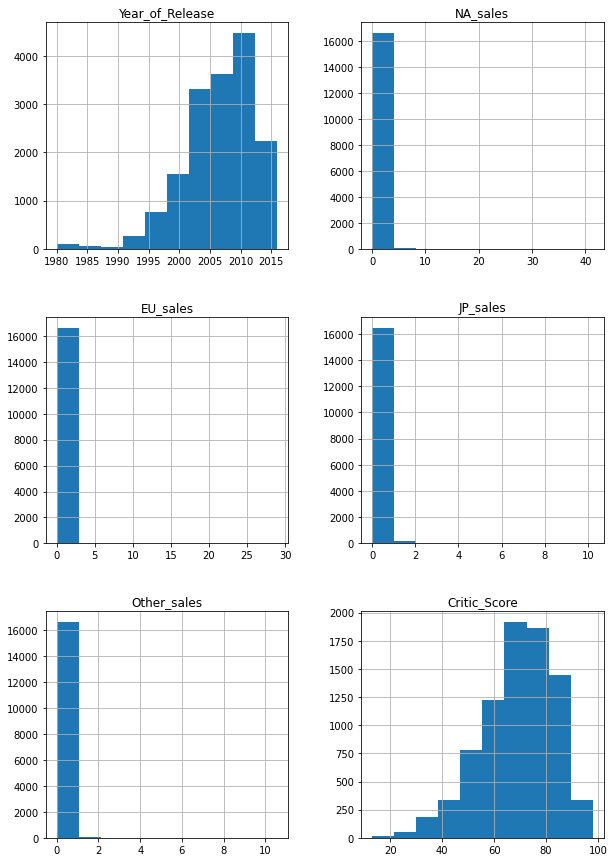

In [9]:
#построим гистограммы для всех числовых столбцов
df.hist(figsize=(10,15));

В 6 из 10 столбцов отсутствуют значения. Явных дубликатов в данных нет. В таблице есть столбцы с разными типами данных: object и float64, которые описывают категориальные и числовые данные. Однако из описания следует, что типы некоторых столбцов нужно будет изменить. Категориальными столбцами являются столбцы "Genre", "Rating" и "Platform".

## Предобработка данных

### Заменить названия столбцов (приведите к нижнему регистру)

In [10]:
col_lower = []
for col in df.columns:
    col = col.lower()
    col_lower.append(col)
df.columns = col_lower
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [114]:
df.columns = df.columns.str.lower()

### Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему

In [11]:
new_df = df.copy()

**Столбец name**

In [12]:
#посмотрим на пропущенные значения
new_df.loc[new_df['name'].isnull()]

#удалим 2 строки с пропущенными значениями
new_df = new_df.drop(new_df.loc[new_df['name'].isnull()].index.tolist())
display(new_df)
new_df['name'].isnull().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


0

Столбец name содержал 2 пропущенных значения, поскольку их немного, поэтому мы просто удалили их из датасета. Тип данных в этом столбце менять не нужно, поскольку названия игр - строковые переменные.

### Обработка пропусков

**Столбец platform**

In [13]:
#посмотрим на пропущенные значения
print(new_df['platform'].isnull().sum())

#посмотрим на уникальные значения
print(new_df['platform'].unique())

0
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Столбец не содержал ни одного пропущенного значения. Тип данных в этом столбце опять-таки менять не нужно, поскольку названия платформ, на которых выходили игры - строковые переменные.

**Столбец year_of_release**

In [21]:
#посмотрим на пропущенные значения
print(new_df['year_of_release'].isnull().sum())

269


In [22]:
display(new_df.query('year_of_release.isnull()')['name'].unique())

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

#восстановим все пропущенные значения вручную
add_yor = {
       'Action Man-Operation Extreme':2000, 'Super Puzzle Fighter II':1996,
       'Charm Girls Club: My Fashion Show':2009, 'Face Racers: Photo Finish':2011,
       'Zero: Tsukihami no Kamen':2008, 'The Hidden':2005, 'Get Fit with Mel B':2010,
       'Mega Man Battle Network: Operation Shooting Star':2009,
       'Smashing Drive':2000, 'Port Royale 3':2012, 'Dream Trigger 3D':2011,
       'Dead Island: Riptide':2013, 'Yoostar on MTV':2011, 'Tornado':1993,
       "McFarlane's Evil Prophecy":2004, 'Drake of the 99 Dragons':2003,
       'Build-A-Bear Workshop: Friendship Valley':2010, 'Rayman Arena':2001,
       'National Geographic Challenge!':2011, 'Alex Rider: Stormbreaker':2006,
       'Chou Soujuu Mecha MG':2006,
       'Prinny: Can I Really Be The Hero? (US sales)':2009,
       'Combat Elite: WWII Paratroopers':2005, "Flip's Twisted World":2010,
       'Mobile Ops: The One Year War':2008,
       "Tom Clancy's Rainbow Six: Critical Hour":2006,
       'Jewel Link Chronicles: Mountains of Madness':2012,
       'Captain America: Super Soldier':2011, 'Mountain Bike Adrenaline':2007,
       'Drill Dozer':2005, 'GRID':2008, 'Tour de France 2011':2011,
       'Reader Rabbit 2nd Grade':1999, 'Monster Hunter Frontier Online':2007,
       'RollerCoaster Tycoon':1999, 'Battle vs. Chess':2011,
       'The History Channel: Great Battles - Medieval':2011,
       'Clockwork Empires':2016, 'B.L.U.E.: Legend of Water':1998, 'NHL Hitz Pro':2003,
       "Luxor: Pharaoh's Challenge":2007, 'Sega Rally 2006':2006,
       'Half-Minute Hero 2':2011, 'Housekeeping':2017, 'Major League Baseball 2K8':2008,
       'Sabre Wulf':1984, 'Swords':1985, 'Beyond the Labyrinth':2012,
       'Bikkuriman Daijiten':2007, 'Majesty 2: The Fantasy Kingdom Sim':2009,
       'Fullmetal Alchemist: Brotherhood':2010,
       'Samurai Spirits: Tenkaichi Kenkakuden':2005, 'World of Tanks':2010,
       'Tom and Jerry in War of the Whiskers':2002, 'Super Duper Sumos':2003,
       'The King of Fighters: Maximum Impact - Maniax':2004,
       'Combat Wings: The Great Battles of WWII':2012, 'Tube Slider':2003,
       'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku':2011,
       'Payout Poker & Casino':2006, 'Wii de Asobu: Metroid Prime':2009,
       'Legacy of Ys: Books I & II':2009, 'Saint':2009, 'Steal Princess':2008,
       'Mario Tennis':2000, 'Runaway: A Twist of Fate':2009,
       "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)":2009,
       "Cabela's Alaskan Adventure":2006,
       'Writing and Speaking Beautiful Japanese DS':2007, 'Virtua Quest':2004,
       "Shonen Jump's Yu-Gi-Oh! GX Card Almanac":2007, 'Without Warning':2005,
       'PDC World Championship Darts 2008':2008,
       'Dinotopia: The Sunstone Odyssey':2003, 'Jet Impulse':2007, 'Dream Dancer':2009,
       "Dance! It's Your Stage":2010, 'Football Manager 2007':2006,
       'Ferrari: The Race Experience':2010, 'Aquaman: Battle for Atlantis':2003,
       'Homeworld Remastered Collection':2015, 'Shorts':2009,
       'AKB1/48: Idol to Guam de Koishitara...':2011,
       'Brothers in Arms: Furious 4':0, 'Agarest Senki: Re-appearance':2008,
       'Freaky Flyers':2003, 'Inversion':2012, 'Hakuouki: Shinsengumi Kitan':2008,
       'Madden NFL 2004':2003, 'FIFA Soccer 2004':2003,
       'LEGO Batman: The Videogame':2008, 'wwe Smackdown vs. Raw 2006':2005,
       'Space Invaders':1978, 'Rock Band':2007,
       "Frogger's Adventures: Temple of the Frog":2001,
       'LEGO Indiana Jones: The Original Adventures':2008, 'Call of Duty 3':2006,
       'Call of Duty: Black Ops':2010, 'Triple Play 99':1998, 'Adventure':1980, 'Combat': 1977,
       'LEGO Harry Potter: Years 5-7':2011, 'NASCAR Thunder 2003':2002,
       'Hitman 2: Silent Assassin':2002, 'Legacy of Kain: Soul Reaver':1999,
       'Donkey Kong Land III':1997, 'Air-Sea Battle':1977, 'Suikoden III':2002,
       'Wheel of Fortune':1987, 'Yakuza 4':2010, 'Namco Museum':1999, 'Rhythm Heaven':2008,
       'The Lord of the Rings: War in the North':2011, 'Madden NFL 07':2006,
       'MLB SlugFest 20-03':2002, 'Shaun White Snowboarding':2008,
       'PES 2009: Pro Evolution Soccer':2008, 'WarioWare: Twisted!':2004,
       'Madden NFL 11':2010, 'Test Drive Unlimited 2':2011,
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe':2005,
       'Monster Hunter 2':2006, 'Metal Gear Solid 2: Substance':2002,
       'Advance Wars: Days of Ruin':2008, 'The Golden Compass':2007,
       'Madden NFL 06':2005, 'NASCAR: Dirt to Daytona':2002, 'Madden NFL 2002':2001,
       'Def Jam: Fight for NY':2004, 'NBA Street Vol. 2':2003, 'Fishing Derby':1980,
       'Wet':2009, 'Sonic the Hedgehog':1991, 'Karate':1982, 'Tiger Woods PGA Tour 07':2006,
       'Circus Atari':1977,
       'The Chronicles of Riddick: Escape from Butcher Bay':2004,
       "Maze Craze: A Game of Cops 'n Robbers":1980, 'Silent Hill: Homecoming':2008,
       'Super Breakout':1978, "Robert Ludlum's The Bourne Conspiracy":2008,
       'NHL Slapshot':2010, 'TERA':2011, 'NFL GameDay 2003':2002,
       'Harvest Moon: Save the Homeland':2001, 'Hangman':1978, 'NBA Live 2003':2002,
       "Cubix Robots for Everyone: Clash 'n' Bash":2001,
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)':2005, 'Tropico 4':2011,
       'Tomb Raider (2013)':2013, 'Bejeweled 3':2010, 'Custom Robo':2004,
       'Final Fantasy XI':2002, 'Singularity':2010, 'Dragster':1980,
       'All-Star Baseball 2005':2004, 'Star Wars Jedi Knight II: Jedi Outcast':2002,
       'Slot Machine':1979, 'The Dukes of Hazzard II: Daisy Dukes It Out':2000,
       'Harvest Moon: The Tale of Two Towns':2010, 'Shrek the Third':2007,
       'Nicktoons: Battle for Volcano Island':2006, 'Haven: Call of the King':2002,
       'Unreal Championship 2: The Liandri Conflict':2005, 'Pac-Man Fever':2002,
       'The Legend of Zelda: The Minish Cap(weekly JP sales)':2004, 'Indy 500':1995,
       'Disgaea 3: Absence of Detention':2008, 'Flag Capture':1978, 'Gun':2005,
       'Rock Revolution':2008, 'College Hoops 2K6':2005,
       'Jonah Lomu Rugby Challenge':2011, 'Mega Man X Collection':2006,
       'BioShock 2':2010, 'Danganronpa: Trigger Happy Havoc':2010, 'Jet X20':2002,
       "Tony Hawk's Downhill Jam":2006, 'Tribes: Aerial Assault':2002,
       'Big Beach Sports 2':2010, 'Yu Yu Hakusho: Dark Tournament':2004,
       'Ghostbusters II':1990, 'Breakaway IV':1978, 'Robotech: Battlecry':2002,
       'Move Fitness':2011, 'Valkyria Chronicles III: Unrecorded Chronicles':2011,
       'DanceDanceRevolution II':2011, 'WRC: FIA World Rally Championship':2010,
       'Famista 64':1997, 'Dead Space 3':2013, 'Pet Zombies':2011, 'Star Trek: Legacy':2006,
       'Backbreaker':2009, 'Twisted Metal: Small Brawl':2001, 'Otomedius Excellent':2011,
       'NBA Starting Five':2002, 'Teen Titans':2006, 'Trauma Team':2010,
       "James Cameron's Dark Angel":2002, 'Sword of the Samurai':1989,
       'Splatterhouse':1988, 'Alone in the Dark: The New Nightmare':2001,
       'Vegas Party':2009, 'Jurassic Park: The Game':2011, 'Home Run':1978,
       'eJay Clubworld':1997, 'Our House Party!':2009, 'WCW Backstage Assault':2000,
       "Disney's Cinderella: Magical Dreams":2005, 'Transworld Surf':2001,
       'Street Fighter IV':2008, 'Nintendo Puzzle Collection':2003,
       'Charm Girls Club: My Fashion Mall':2009, 'Record of Agarest War Zero':2009,
       'Rocksmith':2011,
       'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God':2012,
       'Saru! Get You! Million Monkeys':2006, 'Street Hoops':2002,
       'Godzilla: Destroy All Monsters Melee':2002,
       'The Daring Game for Girls':2009, 'Major League Baseball 2K6':2006,
       'Star Trek: Conquest':2007, 'GiFTPiA':2003, 'Happy Feet Two':2011,
       "Disney's Chicken Little: Ace In Action":2006,
       'Atsumare! Power Pro Kun no DS Koushien':2006,
       'My Healthy Cooking Coach':2009, 'Luminous Arc 2 (JP sales)':2008,
       'Egg Monster Hero':2005, 'Demon Chaos':2005, 'Samurai Shodown Anthology':2008,
          }

mask = new_df['year_of_release'].isin([np.nan])
new_df.loc[mask, 'year_of_release'] = new_df.loc[mask, 'name'].map(add_yor)

#проверим, что больше нет пропусков в этом столбце
print(new_df['year_of_release'].isnull().sum())

In [115]:
#удалим строки с неизвестными годами выпуска игр
new_df = new_df.drop(new_df.loc[new_df['year_of_release'].isnull()].index.tolist())
display(new_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,RP,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,RP,0.01


In [29]:
#проверим, что больше нет пропусков в этом столбце
print(new_df['year_of_release'].isnull().sum())

0


In [30]:
#поменяем тип на int
new_df['year_of_release'] = new_df['year_of_release'].astype(int)

In [32]:
new_df.reset_index(drop=True, inplace=True)
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Столбец содержал 269 пропущенных значения, мы заменили их на данные из Интернета. Вероятно, они были пропущены по невнимательности. Игра "Brothers in Arms: Furious 4" не была выпущена на другой платформе, поэтому мы удалили эту строку. Поскольку ког выпуска - это целое число, то мы изменили тип всего столбца. 

**Столбец genre**

In [34]:
#посмотрим на уникальные значения стобца
print(new_df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


**Столбецы na_sales, eu_sales, jp_sales, other_sales**

In [35]:
#посмотрим на уникальные значения стобца na_sales
print(new_df['na_sales'].unique())

#посмотрим на уникальные значения стобца eu_sales
print(new_df['eu_sales'].unique())

#посмотрим на уникальные значения стобца jp_sales
print(new_df['jp_sales'].unique())

#посмотрим на уникальные значения стобца other_sales
print(new_df['other_sales'].unique())

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+00 2.850e+00 2.530e+00
 2.980

In [36]:
#найдём игры, которые не продавались нигде и удалим их
display(new_df.query('na_sales == 0.0 and eu_sales == 0.0 and jp_sales == 0.0 and other_sales == 0.0'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [37]:
new_df = new_df.drop(new_df.query('na_sales == 0.0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0').index.tolist())
new_df.reset_index(drop=True, inplace=True)
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Столбцы не содержали пропусков, но в двух строках для всех продаж было значение 0.0, а значения рейтинга было неизвестно ни для пользователей, ни для критиков, ни общего. Поэтому мы удалили 2 эти строчки.

**Столбец critic_score**

In [38]:
#посмотрим на значения в этом стоблце
print(new_df['critic_score'].unique())

#посчитаем количество пропущенных значений
print(new_df['critic_score'].isnull().sum())

#заменим значения Nan на 0
new_df['critic_score'] = new_df['critic_score'].fillna(0)

#изменим тип данных на int
new_df['critic_score'] = new_df['critic_score'].astype(int)

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
8459


В столбце оказалось 8578 пропусков, которые, вероятно, появились в наших данных, потому что не все игры критики оценили. Особенно это касается старых игр. Мы заменили значение Nan на 0, а не на медиану, потому что тогда при анализе получили бы неправильные оценки.

**Столбец user_score**

In [39]:
#посмотрим на значения в этом стоблце
print(new_df['user_score'].unique())

#посчитаем количество пропущенных значений
print(new_df['user_score'].isnull().sum())

#посмотрим на срез с значением 'tbd'
display(new_df.query('user_score == "tbd"'))

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
6603


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16423,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16425,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16426,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16432,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


In [40]:
#посмотрим на срез с значением 'tbd' и оценкой критиков равной 0
display(new_df.query('user_score == "tbd" and critic_score == 0'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
716,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.0,0.28,0,tbd,E10+
870,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.0,0.00,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16384,Summer Athletics,PC,2008,Sports,0.00,0.01,0.0,0.00,0,tbd,NaN
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.00,0,tbd,M
16416,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.0,0.00,0,tbd,T
16432,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


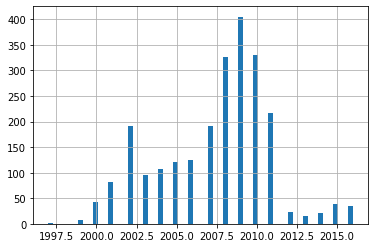

In [41]:
#посмотрим на распределение по годам
new_df.query('user_score == "tbd"')['year_of_release'].hist(bins=61);

Для больше, чем половины значений tbd, оценка критиков равна 0. Ещё можем посмотреть на распределение этого значения по годам. Оказывается, что большинство таких неоценённых игр было с 2008 по 2011 и в 2002. Вероятно, это связано с тем, что в эти промежутки времени просто больше игр выпускалось в целом.

In [42]:
#заменим tbd на 0
new_df.loc[new_df['user_score'] == 'tbd', 'user_score'] = 0

#заменим Nan на 0
new_df['user_score'].fillna(0, inplace=True)

#изменим тип данных на float
new_df['user_score'] = new_df['user_score'].astype(float)

In [43]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


В столбце user_score имеется 2424 значения 'tbd', большинство из этих строк также имеет нулевые продажи на японском рынке. Сама аббревиатура tbd -это to be determined, для нас это означает, что оценка либо равна 0, либо просто отсутствует, поэтому следует его заменить на то же, что и Nan. Количество пропущенных значений было равно 6696. И те, и другие значения были заменены на 0. Также был проведён некоторый анализ столбца user_score по значению tbd.

**Столбец rating**

In [44]:
#посмотрим на значения в этом стоблце
print(new_df['rating'].unique())

#посчитаем количество пропущенных значений
print(new_df['rating'].isnull().sum())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
6674


In [45]:
#посмотрим на срез данных с значением Nan в столбце rating
new_df.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


In [46]:
#посмотрим на срез с значением 'Nan' и оценкой критиков равной 0
new_df.query('rating.isnull() and critic_score == 0.0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде (Википедия). 
* 'E' - базовый рейтенг, подходит для всех возрастов
* 'M' - подходит только для тех, кто старше 17 лет
* 'T' - подходит для игроков 13 лет и старше
* 'E10+' -  подходит для детей 10 лет и старше
* 'K-A' - подходит для возрастной категории от 6 лет и старше
* 'RP' - категория ещё не присвоена
* 'AO' - подходит для взрослых старше 18 лет
* 'EC' - для детей младшего возраста. Подходит для детей от 3 лет

Поэтому заменить надо будет исходя из значений в столбце genre. Либо просто заменить на значение RP, поскольку значение может отсутствовать как раз по причине того, что категория просто не присвоена.

In [47]:
#посмотрим на уникальные значения стобца genre
print(new_df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [48]:
new_df.query('genre == "Puzzle"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77,7.1,E
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,0,0.0,NaN
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,0,0.0,NaN
172,Dr. Mario,GB,1989,Puzzle,2.18,0.96,2.00,0.20,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16378,Real Crimes: The Unicorn Killer,DS,2011,Puzzle,0.00,0.01,0.00,0.00,0,0.0,NaN
16390,Bookworm Deluxe,PC,2006,Puzzle,0.01,0.00,0.00,0.00,0,8.0,E
16407,XI Coliseum,PSP,2006,Puzzle,0.00,0.00,0.01,0.00,0,0.0,NaN
16425,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53,0.0,E


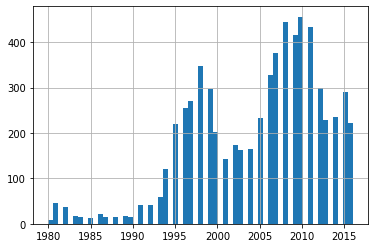

In [49]:
#посмотрим на распределене значений Nan в столбце rating по годам
new_df.query('rating.isnull()')['year_of_release'].hist(bins=61);

In [50]:
#заменим пропущенные значения на категорию RP
new_df['rating'] = new_df['rating'].fillna('RP')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  int64  
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


В столбце rating пропущено 6762 значений, мы разобрались в категориях рейтинга, коорые могут быть присвоены игре. Пришли к выводу, что лучше всего заменить данные на категорию 'RP' (категория ещё не присвоена). Также были обнаружены интересные закономерномести: в подавляющем большинстве случаев рейтинг отсутствует там, где нет оценки критиков и в промежутке с 2008 по 2011 и с 1997 по 1999 было больше всего игр без категорий.

### Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

In [51]:
new_df['total_sales'] = new_df['na_sales'] + new_df['eu_sales'] + new_df['jp_sales'] + new_df['other_sales']
display(new_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,RP,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,RP,0.01


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

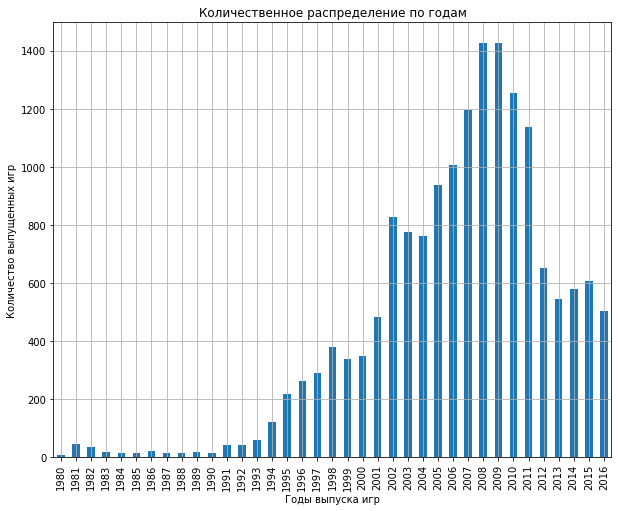

In [52]:
#сгруппируем количество выпущенных игр по годам и построим гистограмму
(new_df['year_of_release']
     .value_counts()
     .sort_index(ascending=True)
     .plot(kind='bar', grid=True, figsize=(10,8))
     .set(title='Количественное распределение по годам',
         xlabel='Годы выпуска игр',
         ylabel='Количество выпущенных игр')
);

In [53]:
#сгруппируем количество выпущенных игр по годам 
new_df.groupby('year_of_release')['name'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1425
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Из гистограммы и сгруппированных данных видно, что до 1994 года выпускалось не более 100 игр в год. И начиная с этого года вплоть до 1998, наблюдается рост количества игр. Затем в 1999 и 2000 небольшой спад. И после этого был резкий скачок с 490 в 2001 до 850 в 2002. После чего наступило двухгодичное "затишье", а затем снова рост до 2007 - 08 годов, где количество игр, выпускаемых в год, достигло максимума в 1450. Далее можем наблюдать тенденцию к спаду: к 2012 году количесвтво игрового контента снизилось почти в 2 раза. И за последующие несколько лет показатель количества игр в год оставался примерно в одних пределах. Данные за 2017 и далее практически отсутствуют.

Так как наши данные лежать в довольно большом временном промежутке, то, естественно, не все данные важны и акуальны. Какие-то платформы за это время просто могли уйти с рынка компьютерных игр.

### Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [54]:
#сгруппируем данные по платформе и году выпуска, затем отсортируем по убыванию дохода
plat_sales_year = (new_df.groupby(['platform', 'year_of_release'])['total_sales']
                    .agg(['sum']).sort_values(by='sum', ascending=False)
                  )
                  
plat_sales_year.head(20)

sum
platform year_of_release        
PS2      2004             211.81
Wii      2009             206.97
PS2      2002             205.38
         2003             184.31
Wii      2008             171.32
X360     2010             170.03
PS       1998             169.49
PS2      2001             166.43
         2005             160.66
PS3      2011             156.78
Wii      2007             152.77
DS       2007             146.94
         2008             145.31
PS       1999             144.53
X360     2011             143.84
PS3      2010             142.17
Wii      2006             137.15
PS       1997             136.17
X360     2008             135.26
PS3      2009             130.93

In [55]:
#меняем колонку с индексами на полноценную колонку
plat_sales_year.reset_index(['platform', 'year_of_release'], inplace= True )
plat_sales_year.head(10)

,platform,year_of_release,sum
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


In [56]:
#опишем эту таблицу
plat_sales_year['sum'].describe()

count    238.000000
mean      37.035168
std       48.493792
min        0.020000
25%        3.620000
50%       16.055000
75%       50.477500
max      211.810000
Name: sum, dtype: float64

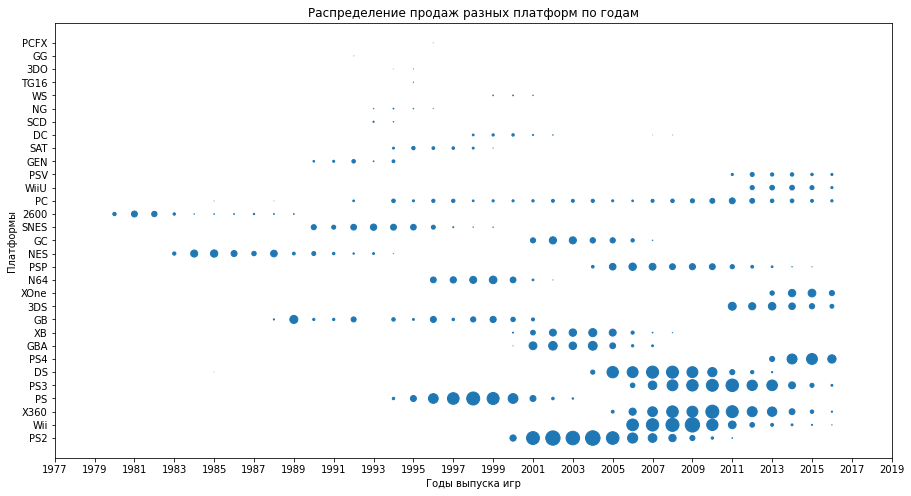

In [57]:
#построим распределение продаж от игр для разных платформ для разных лет
plat_sales_year.plot.scatter(x='year_of_release', y='platform', s = 'sum', figsize=(15,8)).set(title='Распределение продаж разных платформ по годам',
                                                                          xlabel='Годы выпуска игр',
                                                                          ylabel='Платформы');
plt.xticks(np.arange(1977, 2020, step=2));

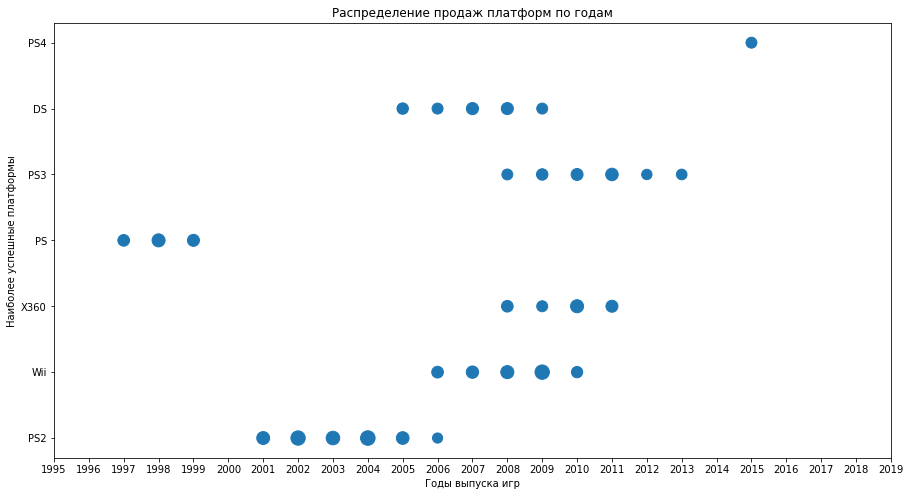

In [58]:
#построим аналогичное распределение продаж для наиболее успешных платформ
success_plat = plat_sales_year.query('sum > 100')

success_plat.plot.scatter(x='year_of_release', y='platform', s = 'sum', figsize=(15,8)).set(title='Распределение продаж платформ по годам',
                                                                          xlabel='Годы выпуска игр',
                                                                          ylabel='Наиболее успешные платформы');
plt.xticks(np.arange(1995, 2020, step=1));

Как оказалось наиболее успешными в плане продаж оказались платформы PS, PS2, PS3, PS4, DS, X360 и Wii. Их доход, как показывает график выше, в разы превышает доходы остальных платформ от продаж.

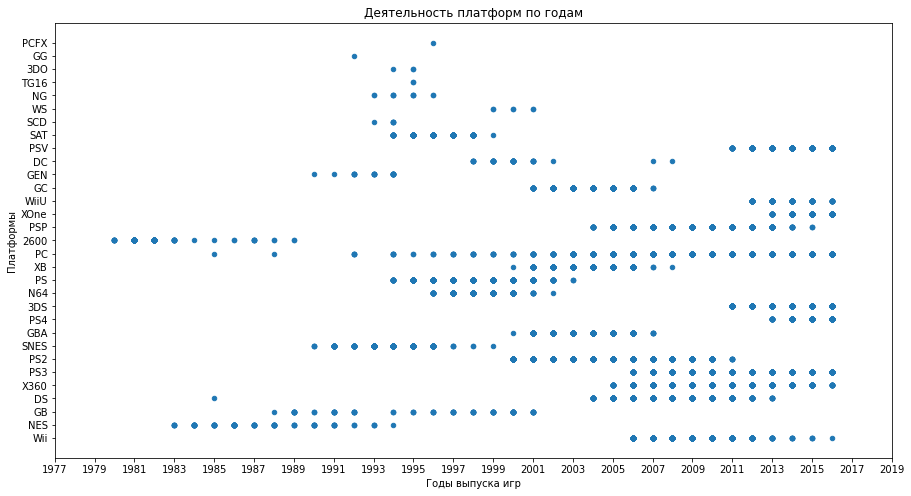

In [59]:
#построим график
new_df.plot.scatter(x='year_of_release', y='platform', figsize=(15,8)).set(title='Деятельность платформ по годам',
                                                                          xlabel='Годы выпуска игр',
                                                                          ylabel='Платформы')
plt.xticks(np.arange(1977, 2020, step=2));

Как видно из графика, к  2010-м года на рынке видео игр осталась треть от всех платформ, информация о которых представлена в таблице. Некоторые платформы исчезли к 90-м годам (2600), другие - к 2000-м (PCFX, GG, 3DO, TG16, NG).

In [60]:
#сгруппируем наши данные по столбцам platform и year_of_release, избавившись сначала от повторений
unique_platform_year = new_df.loc[:, ['platform', 'year_of_release']].drop_duplicates()
#display(unique_platform_year)

life_platform = (unique_platform_year.groupby(['platform'])['year_of_release']
                    .agg(['count']).sort_values(by='count', ascending=False)
                  )

#меняем колонку с индексами на полноценную колонку
life_platform.reset_index('platform', inplace= True )

life_platform.head(10)

,platform,count
0,PC,26
1,GB,13
2,NES,12
3,X360,12
4,PSP,12
5,PS2,12
6,Wii,11
7,DS,11
8,PS3,11
9,2600,10


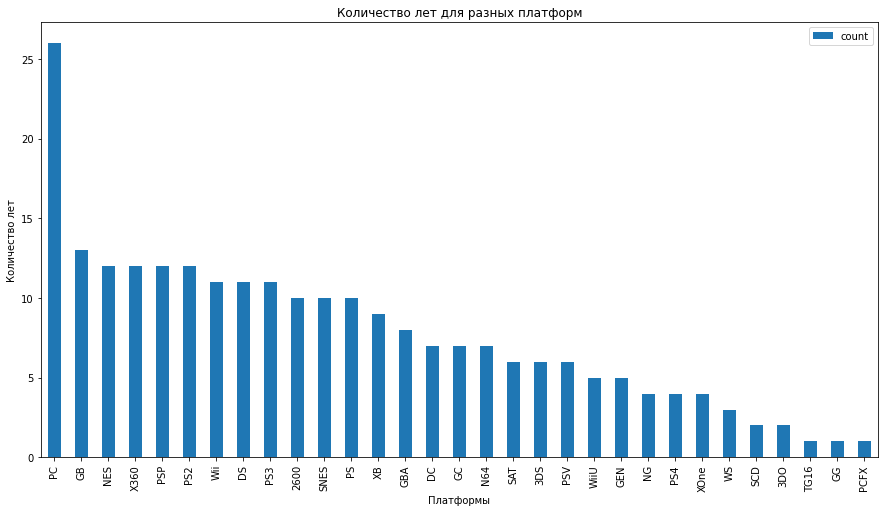

In [61]:
#построим график по таблице
life_platform.plot.bar(x='platform', y='count', figsize=(15,8)).set(title='Количество лет для разных платформ',
                                                                    ylabel='Количество лет',
                                                                    xlabel='Платформы');

In [62]:
#найдём характерное время, за которое исчезают платформы = среднему времени жизни платформ
print(life_platform['count'].describe())
print('Характерное время, за которое исчезают платформы: {} лет'.format(life_platform['count'].median()))

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: count, dtype: float64
Характерное время, за которое исчезают платформы: 7.0 лет


In [63]:
#найдём характерное время появления платформ
N = life_platform.shape[0]
duration = 2016 - 1977
mean_lifetime = life_platform['count'].mean()
time = mean_lifetime / (N / (duration / mean_lifetime))
print('Характерное время появления платформы: {} года'.format(time))

Характерное время появления платформы: 1.2580645161290323 года


Были построены таблицы и графики продаж для всех платформ по годам. Были найдены наиболее успешные с коммерческой точки зрения платформы. Их доход из года в год оставался стабольно высоким и был значительно больше, чем у их конкурентов. 

В среднем платформы остаются на рынке в течение 8 лет, а каждая новая появляется практически каждый год. 

### Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период можно определить по гистограмме 'Количественное распределение по годам': поведение до 2012 года отличается практически в 2 раза от поведения после. Именно по этой причине актуальный период - это промежуток с 2013 по 2016. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Актуальный период подобрала правильно, он позволит сделать корректный прогноз продаж в 2017 году.

In [64]:
#отфильтруем данные для последующего анализа
data_cast = new_df.query('2012 < year_of_release < 2017')
data_cast.reset_index(drop=True, inplace=True)
data_cast

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,RP,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01


In [65]:
#найдём платформы, которые всё ещё актуальны в 2016
platform_2016 = data_cast.query('year_of_release == 2016')['platform'].unique()
print(platform_2016)

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'X360' 'PSV' 'Wii']


In [66]:
#опять отфильтруем данные на предмет актуальности платформ 
data_cast = data_cast.query('platform in @platform_2016')
data_cast

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,RP,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,RP,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,RP,0.01


### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

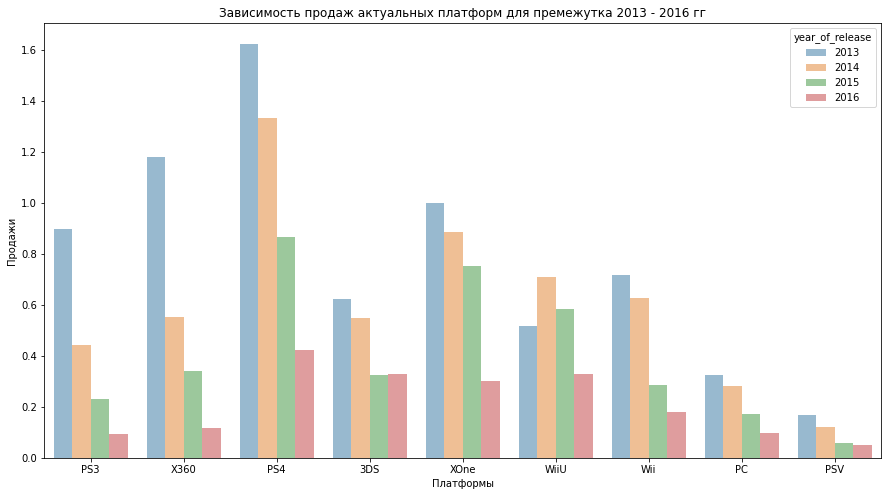

In [67]:
#построим график продаж платформ в разные годы
plt.figure(figsize=(15,8))
sns.barplot(x='platform', y='total_sales', hue='year_of_release', data=data_cast, ci=None, alpha=0.5);
plt.xlabel('Платформы');
plt.ylabel('Продажи');
plt.title('Зависимость продаж актуальных платформ для премежутка 2013 - 2016 гг');

Так или иначе для всех платформ, представленных на гистограмме, наблюдается тенденция, что продажи видео игр падают. Проанализировав продажи за 2016 год для этих платформ, можно выделить несколько потенциально прибыльных компаний: PS4, 3DS, XOne и WiiU.

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат

In [68]:
#видимо, нужно рассмотреть 2016 год, чтобы понять, какие игры были самыми прибыльными для их платформ
game_2016 = data_cast.query('year_of_release == 2016')
game_2016['total_sales'].describe()


success_games = game_2016.query('total_sales > 0.2')['name'].reset_index(drop=True)
success_games

0                             FIFA 17
1                    Pokemon Sun/Moon
2          Uncharted 4: A Thief's End
3      Call of Duty: Infinite Warfare
4                       Battlefield 1
                    ...              
112                      Dishonored 2
113                       Doom (2016)
114              Dragon Ball: Fusions
115            World of Final Fantasy
116        Mega Man Legacy Collection
Name: name, Length: 117, dtype: object

In [70]:
#построим таблицу коммерчески успешных игр по платформам
success_games = game_2016.groupby(['platform', 'name'])['total_sales'].agg(['sum']).sort_values(by='sum', ascending=False)

In [71]:
#меняем колонку с индексами на полноценную колонку
success_games.reset_index(['platform', 'name'], inplace= True )
success_games.head(10)

,platform,name,sum
0,PS4,FIFA 17,7.60
1,3DS,Pokemon Sun/Moon,7.14
2,PS4,Uncharted 4: A Thief's End,5.39
3,PS4,Call of Duty: Infinite Warfare,4.47
4,PS4,Battlefield 1,4.07
5,PS4,Tom Clancy's The Division,3.80
6,XOne,FIFA 17,2.65
7,XOne,Call of Duty: Infinite Warfare,2.42
8,PS4,Far Cry: Primal,2.26
9,XOne,Battlefield 1,2.25


In [72]:
#первые 10 самых покупаемых игр
top_games = success_games['name'].unique()[0:10]

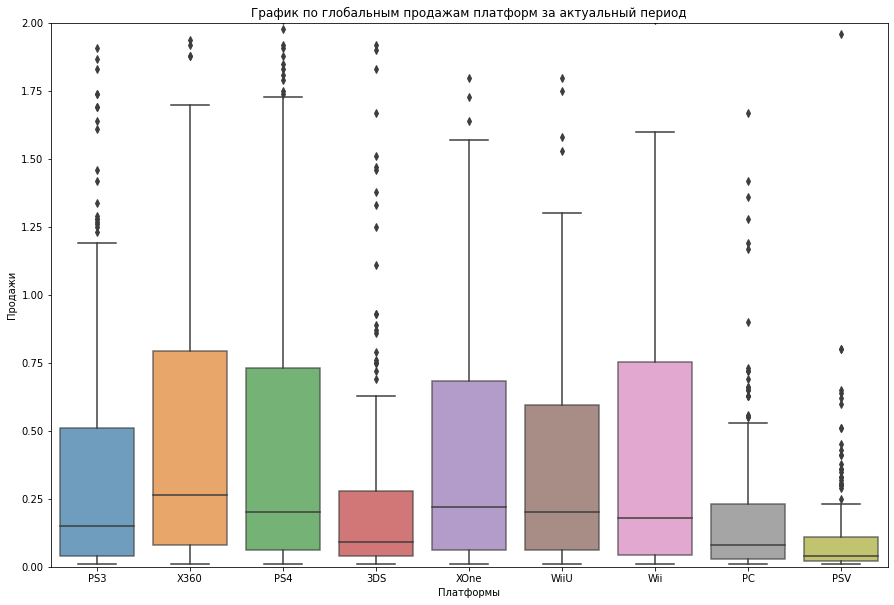

In [121]:
plt.figure(figsize=(15,10))
sns.boxplot(x='platform',y='total_sales',boxprops=dict(alpha=0.7), data=data_cast);
plt.xlabel('Платформы');
plt.ylabel('Продажи');
plt.title('График по глобальным продажам платформ за актуальный период');
plt.ylim(0,2);

Построила график для продаж платформ за период с 2013 по 2016. У всех платформ среднее будет больше, чем медианное значение. Самый большой размах продаж у PS4, самый маленький - у PSV. Наиболее коммерчески успешные платформы - это PS4, X36, XOne, Wii и WiiU. Получается, чтобы оценить прибыльность, надо сравнить длину усов от верхнего квартиля до максимального значения: PS4, X360 и XOne.

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.

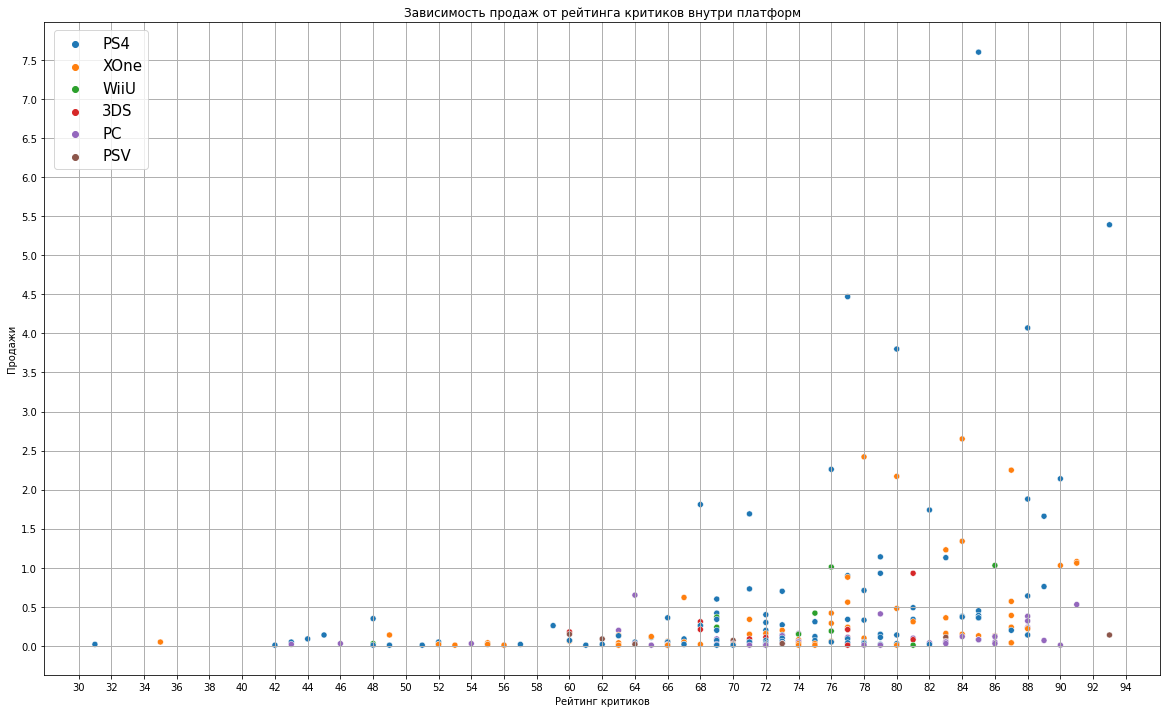

In [78]:
#построим зависимость продаж от рейтинга критиков
plt.figure(figsize=(20,12))
sns.scatterplot(x='critic_score',y='total_sales', hue = 'platform', data=data_cast.query('year_of_release == 2016 and critic_score != 0.0'));
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга критиков внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(30, 95, step=2));
plt.yticks(np.arange(0, 8, step=0.5));
plt.grid(linewidth=1) 

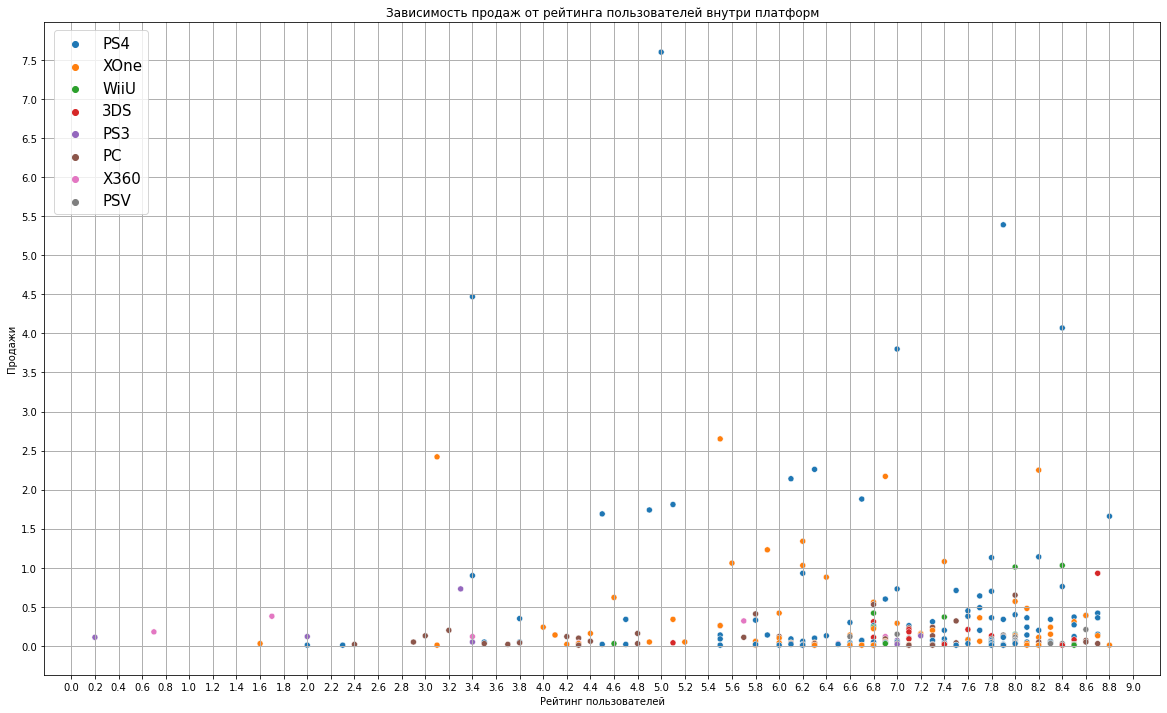

In [58]:
#построим зависимость продаж от рейтинга пользователей
plt.figure(figsize=(20,12))
sns.scatterplot(x='user_score',y='total_sales', hue = 'platform', data=data_cast.query('year_of_release == 2016 and user_score != 0.0'));
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга пользователей внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(0, 9.1, step=0.2));
plt.yticks(np.arange(0, 8, step=0.5));
plt.grid(linewidth=1) 

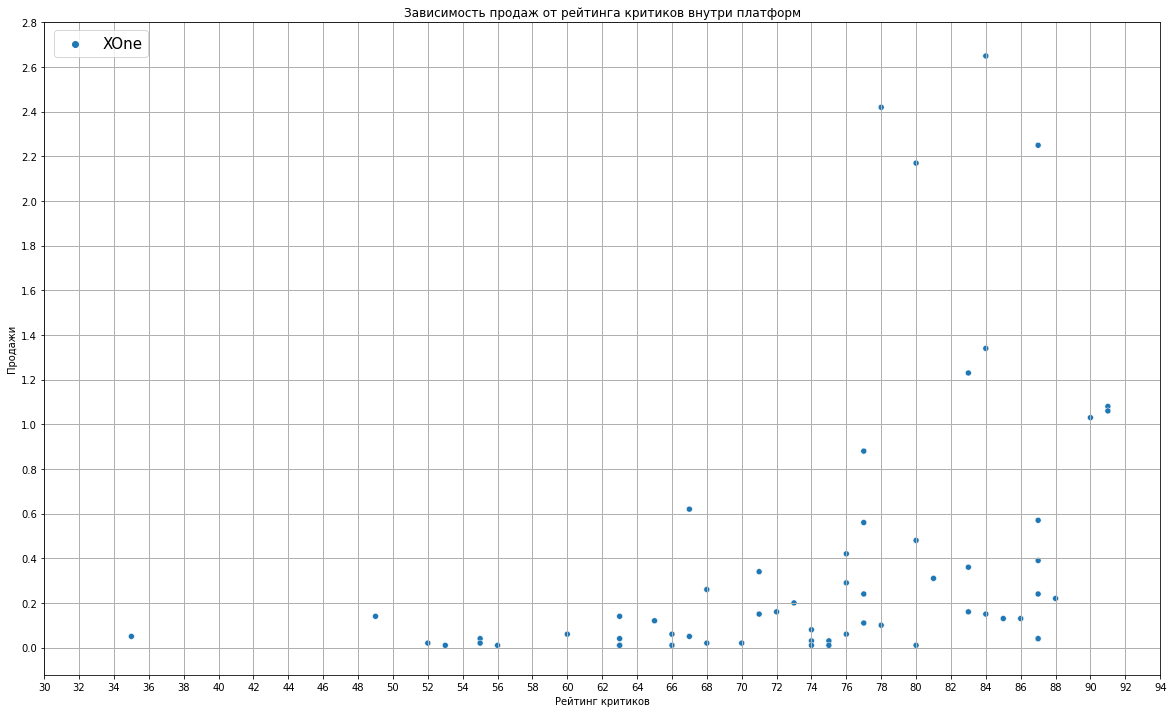

In [79]:
#теперь построим то же самое для платформы XOne
#построим зависимость продаж от рейтинга критиков
plt.figure(figsize=(20,12))
sns.scatterplot(x='critic_score',y='total_sales', hue = 'platform',\
                data=data_cast.query('year_of_release == 2016 and critic_score != 0.0 and platform == "XOne"'));
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга критиков внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(30, 95, step=2));
plt.yticks(np.arange(0, 3, step=0.2));
plt.grid(linewidth=1) 

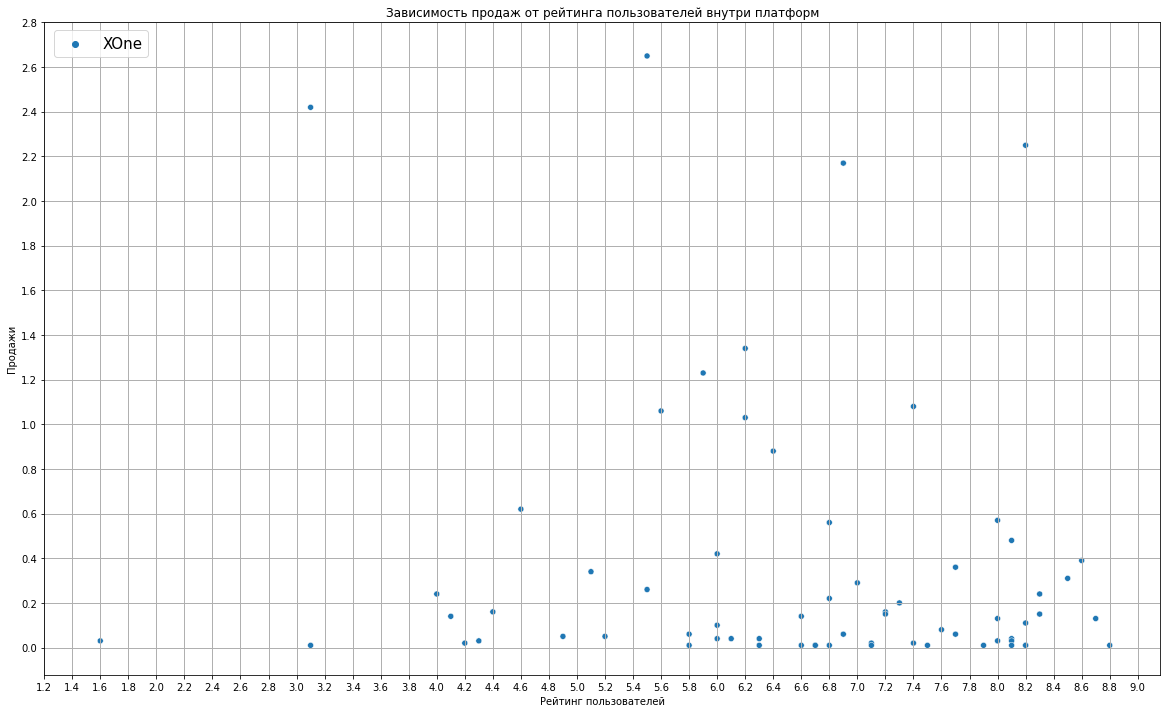

In [60]:
#теперь построим то же самое для платформы XOne
#построим зависимость продаж от рейтинга пользователей
plt.figure(figsize=(20,12))
sns.scatterplot(x='user_score',y='total_sales', hue = 'platform',\
                data=data_cast.query('year_of_release == 2016 and user_score != 0.0 and platform == "XOne"'));
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга пользователей внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(1.2, 9.2, step=0.2));
plt.yticks(np.arange(0, 3, step=0.2));
plt.grid(linewidth=1) 

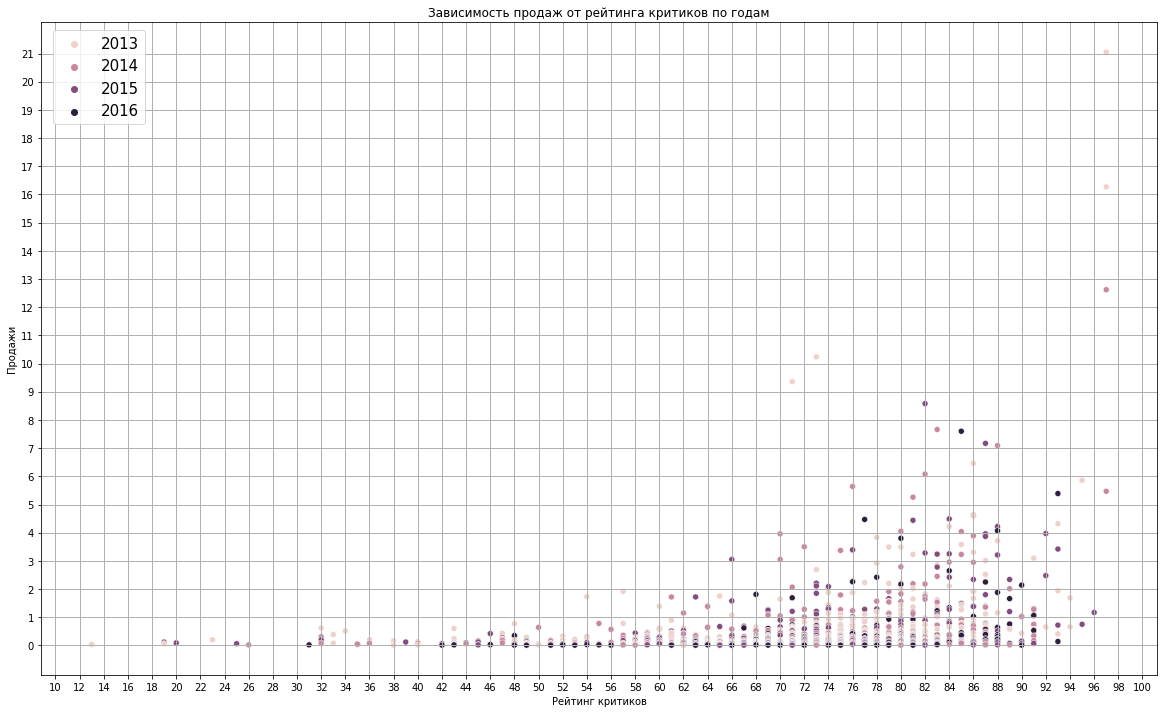

In [80]:
#построим зависимость продаж от рейтинга критиков по годам
plt.figure(figsize=(20,12))
sns.scatterplot(x='critic_score',y='total_sales', hue = 'year_of_release', data=data_cast.query('critic_score != 0.0'));
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга критиков по годам');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(10, 101, step=2));
plt.yticks(np.arange(0, 22, step=1));
plt.grid(linewidth=1) 

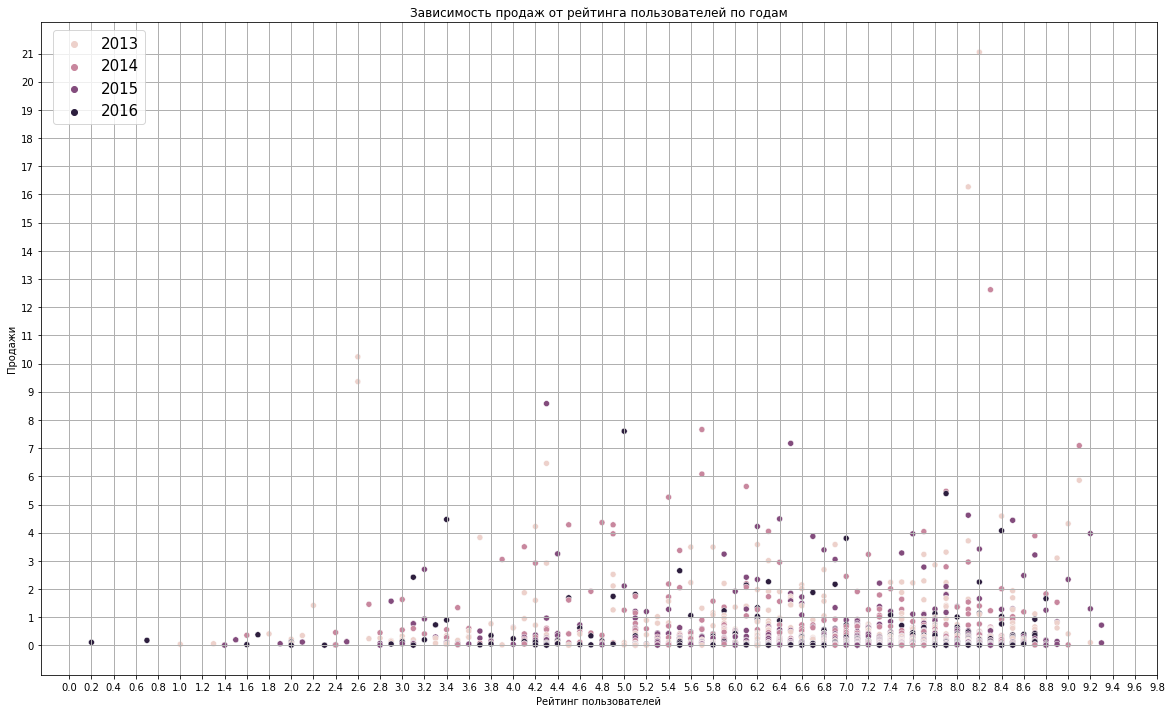

In [81]:
#построим зависимость продаж от рейтинга пользователей по годам
plt.figure(figsize=(20,12))
sns.scatterplot(x='user_score',y='total_sales', hue = 'year_of_release', data=data_cast.query('user_score != 0.0'));
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга пользователей по годам');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(0, 10, step=0.2));
plt.yticks(np.arange(0, 22, step=1));
plt.grid(linewidth=1) 

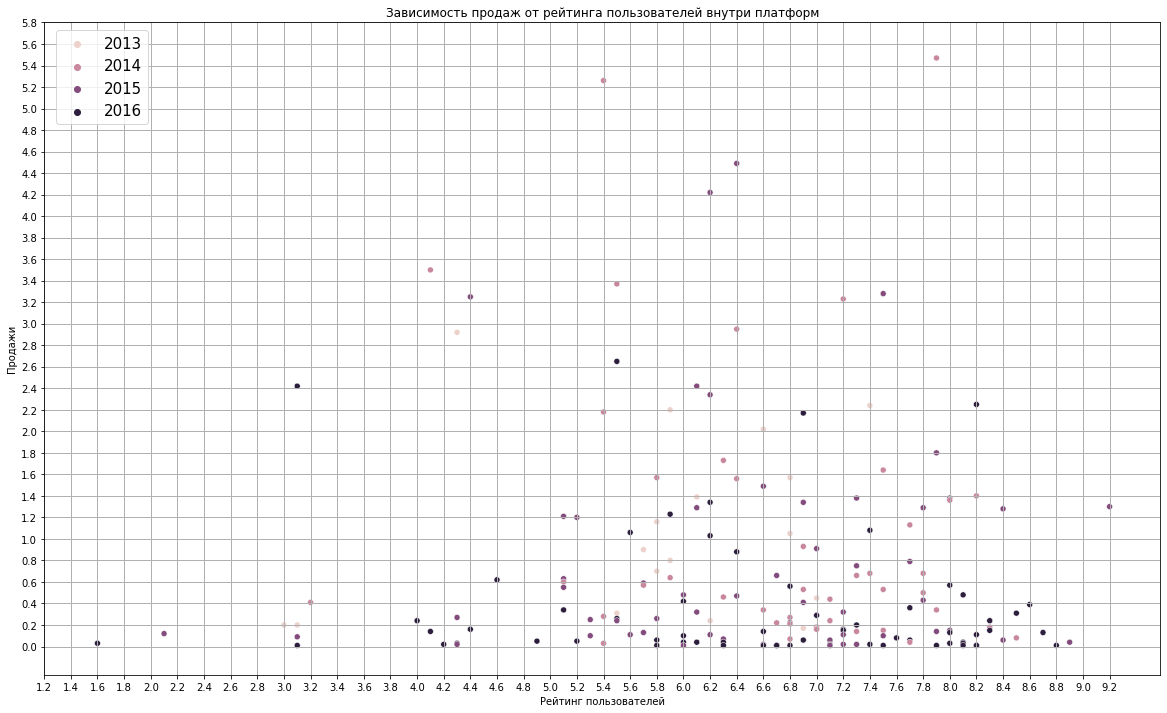

In [82]:
#теперь построим то же самое для платформы XOne
#построим зависимость продаж от рейтинга пользователей
plt.figure(figsize=(20,12))
sns.scatterplot(x='user_score',y='total_sales', hue = 'year_of_release',\
                data=data_cast.query('user_score != 0.0 and platform == "XOne"'));
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга пользователей внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(1.2, 9.3, step=0.2));
plt.yticks(np.arange(0, 6, step=0.2));
plt.grid(linewidth=1) 

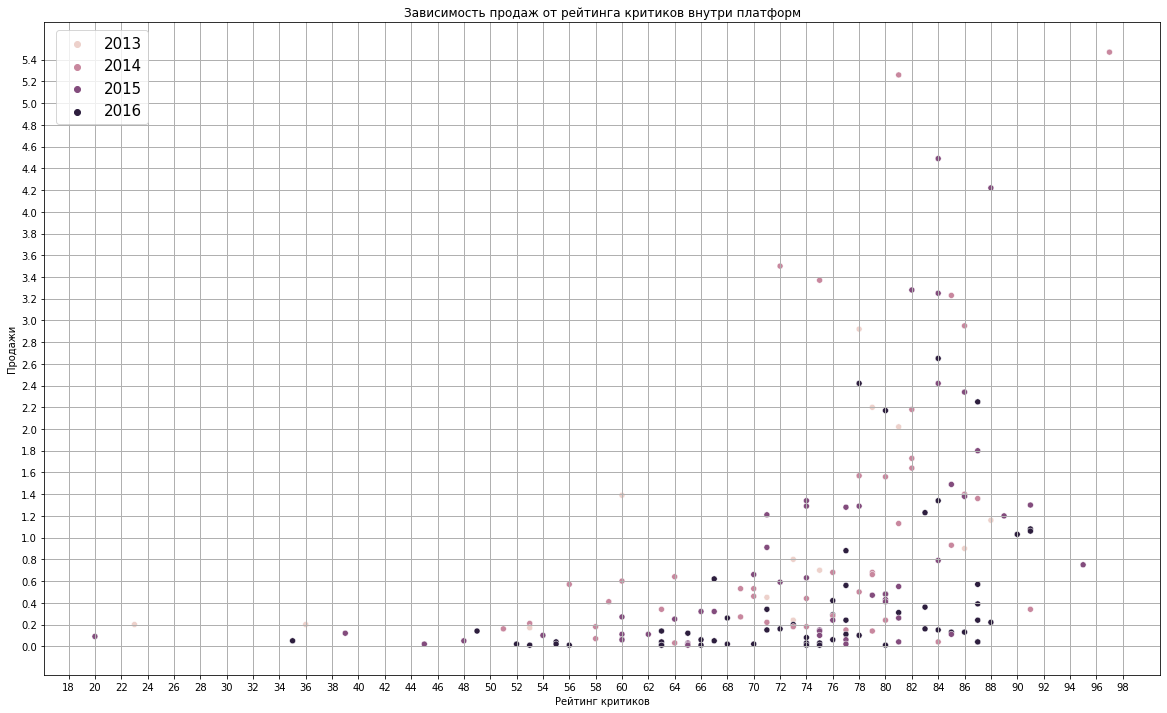

In [83]:
#теперь построим то же самое для платформы XOne
#построим зависимость продаж от рейтинга критиков
plt.figure(figsize=(20,12))
sns.scatterplot(x='critic_score',y='total_sales', hue = 'year_of_release',\
                data=data_cast.query('critic_score != 0.0 and platform == "XOne"'));
plt.xlabel('Рейтинг критиков');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от рейтинга критиков внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(18, 100, step=2));
plt.yticks(np.arange(0, 5.6, step=0.2));
plt.grid(linewidth=1) 

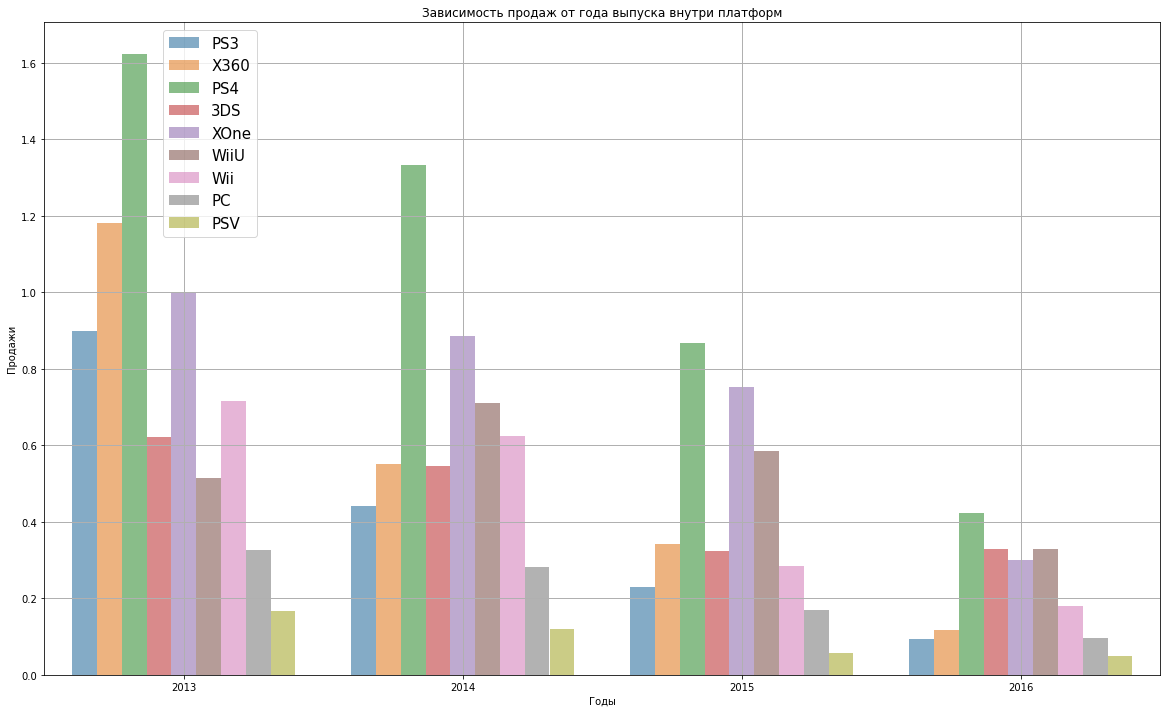

In [84]:
#теперь построим то же самое для платформы XOne
#построим зависимость продаж от года выпуска
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue = 'platform',\
                data=data_cast, ci= None, alpha=.6);
plt.xlabel('Годы');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от года выпуска внутри платформ');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.grid(linewidth=1) 

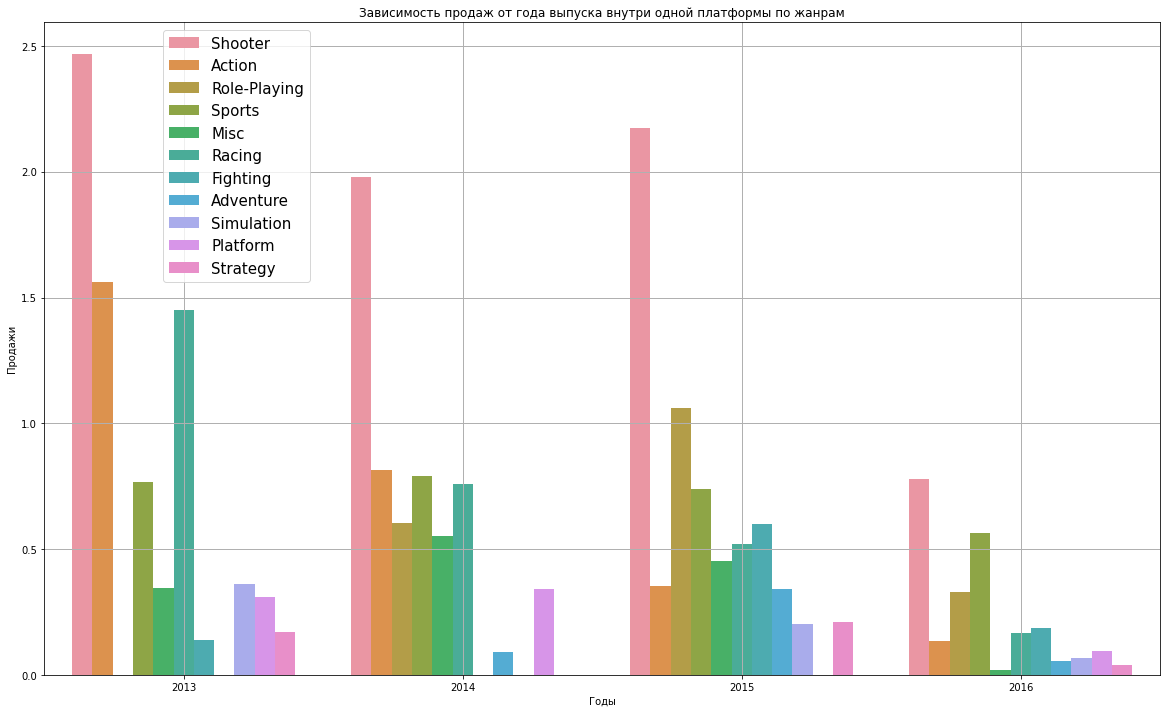

In [85]:
#построим зависимость продаж от года выпуска по жанрам
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue = 'genre',\
                data=data_cast.query('platform == "XOne"'), ci= None);
plt.xlabel('Годы');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от года выпуска внутри одной платформы по жанрам');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.grid(linewidth=1) 

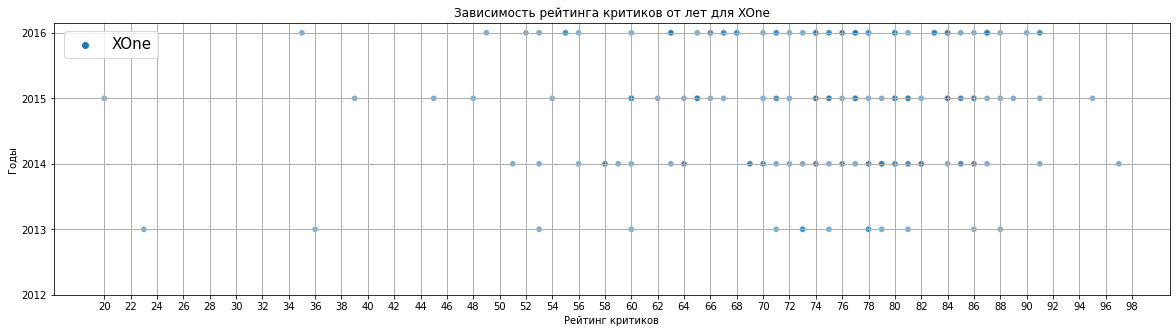

In [86]:
#теперь построим то же самое для платформы XOne
#построим график рейтинга критиков от лет
plt.figure(figsize=(20,5))
sns.scatterplot(x='critic_score',y='year_of_release', hue = 'platform',\
                data=data_cast.query('platform == "XOne" and critic_score != 0.0'), alpha=.6);
plt.xlabel('Рейтинг критиков');
plt.ylabel('Годы');
plt.title('Зависимость рейтинга критиков от лет для XOne');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(20, 100, step=2));
plt.yticks(np.arange(2012, 2017, step=1));
plt.grid(linewidth=1) 

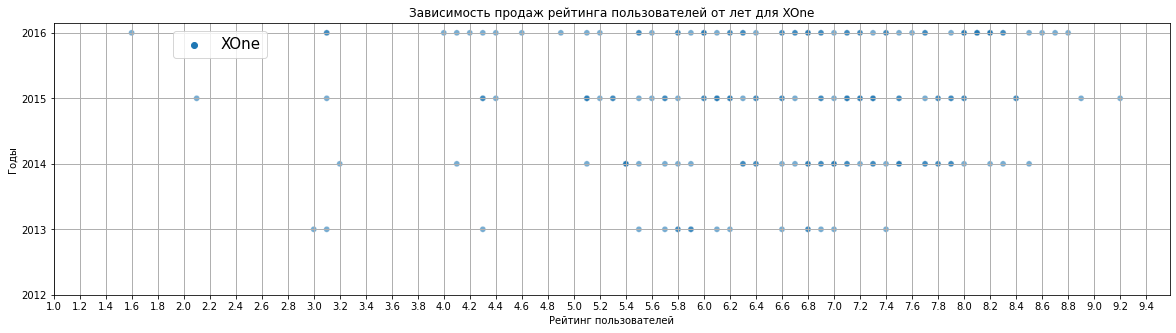

In [87]:
#построим график рейтинга пользователей от лет
plt.figure(figsize=(20,5))
sns.scatterplot(x='user_score',y='year_of_release', hue = 'platform',\
                data=data_cast.query('platform == "XOne" and user_score != 0.0'), alpha=.6);
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Годы');
plt.title('Зависимость продаж рейтинга пользователей от лет для XOne');
plt.legend(bbox_to_anchor=(0.1, 1),prop={'size': 15});
plt.xticks(np.arange(1, 9.6, step=0.2));
plt.yticks(np.arange(2012, 2017, step=1));
plt.grid(linewidth=1) 

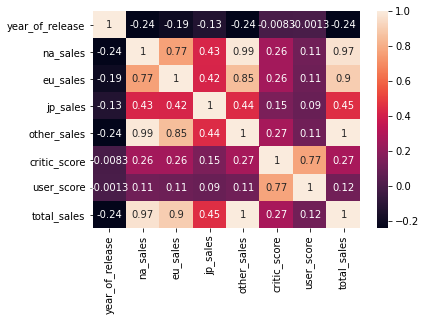

In [88]:
#построим корреляционную таблицу
data_cast[(data_cast['platform'] == 'XOne')].corr()
sns.heatmap(data_cast[(data_cast['platform'] == 'XOne')].corr(), annot=True);

Выручка платформы XOne с каждым годом уменьшается. Однако количество жанров игр, которое они выпускают растёт. Наиболее прибыльный жанр для этой платформы - Shooter. Количество оценок как критиков, так и пользователей растёт с течением времени. И в принципе количество высоких пользовательских оценок тоже растёт, также как и количество оценок критиков. Исходя из анализа тепловой диаграммы, корреляция между продажами и оценками критиков больше, чем между продажами и оценками пользователей. Однако зависимость несильная. 

Куда более сильная корреляция между мнением пользователей и оценкой критиков.

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

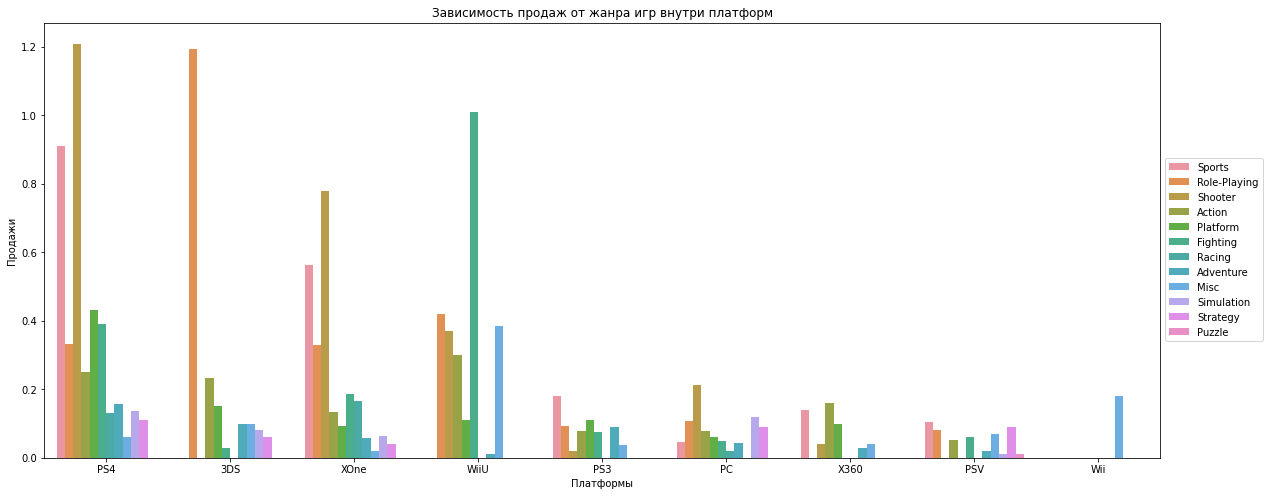

In [89]:
#построим разбивку по жанрам внутри одной платформы
plt.figure(figsize=(20,8))
sns.barplot(x='platform',y='total_sales', hue = 'genre', data=data_cast.query('year_of_release == 2016'), ci= None);
plt.xlabel('Платформы');
plt.ylabel('Продажи');
plt.title('Зависимость продаж от жанра игр внутри платформ');
plt.legend(bbox_to_anchor=(1, 0.7),prop={'size': 10});

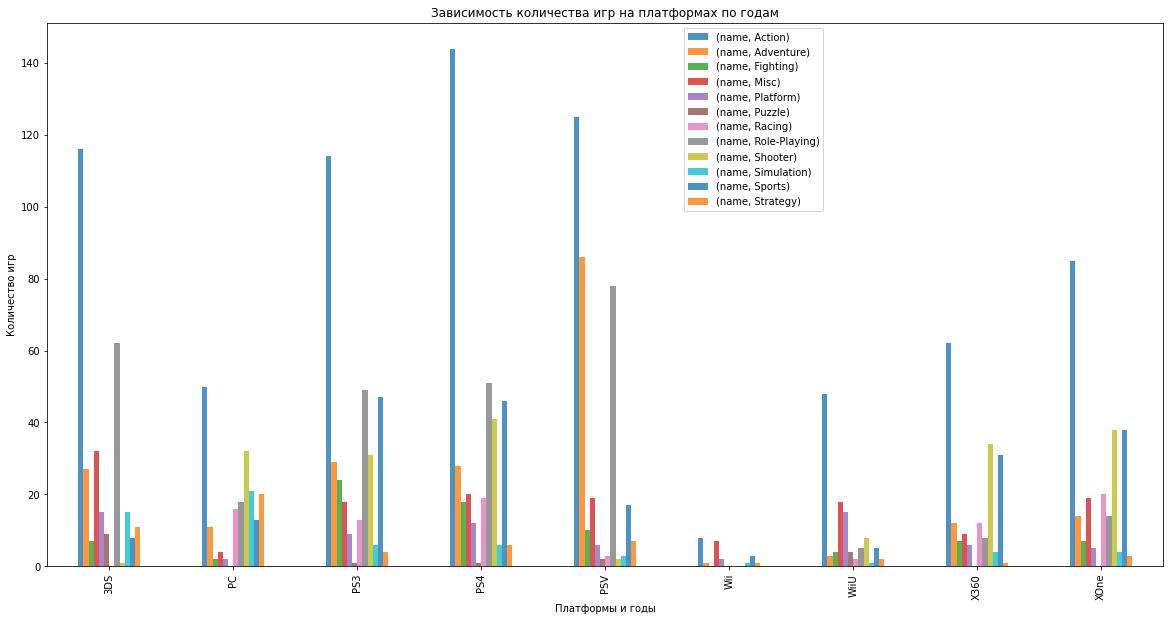

In [90]:
#построим как меняется количество выпускаемых игр по жанрам
data_cast.pivot_table('name',['platform','genre'], aggfunc='count').unstack().plot(kind='bar', figsize=(20,10), alpha=.8);
plt.title('Зависимость количества игр на платформах по годам');
plt.xlabel('Платформы и годы');
plt.ylabel('Количество игр');
plt.legend(bbox_to_anchor=(0.7, 1));

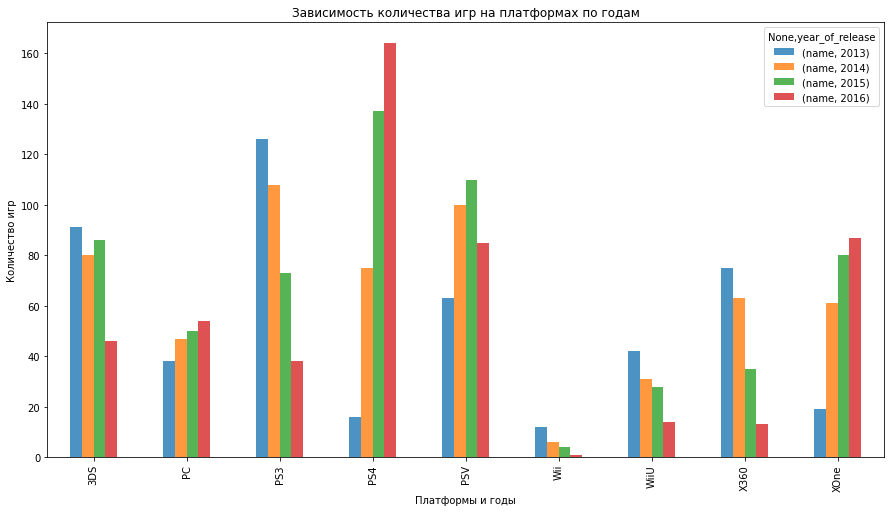

In [91]:
#построим как меняется количество выпускаемых игр по годам
data_cast.pivot_table('name',['platform','year_of_release'], aggfunc='count').unstack().plot(kind='bar', figsize=(15,8), alpha=.8);
plt.title('Зависимость количества игр на платформах по годам');
plt.xlabel('Платформы и годы');
plt.ylabel('Количество игр');

Мы получили распредление игр по жанрам. Больше всего выпускалось игр, жанр которых Action, затем Role_Playing и Adventure. Но самыми продаваемыми игровыми жанрами являются Shooter, Role Playing и Fighting. Если смотреть количество выпускаемых игр, то для платформ PC, PS4 и XOne есть тенденция к увеличению количества выпускаемого контента. Для остальных платформ тенденция совершенно противоположная.

## Составление портрет пользователя каждого региона

### Определить для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Описать различия в долях продаж.

In [92]:
platforms_2016 = game_2016.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], \
                                       ['platform'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
platforms_2016

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS4,31.78,5.74,21.49,10.24,69.25
XOne,9.63,0.01,14.27,2.24,26.15
3DS,2.33,8.03,4.14,0.64,15.14
WiiU,1.48,0.67,2.10,0.35,4.60
PC,3.53,0.00,1.36,0.36,5.25
X360,0.71,0.00,0.69,0.12,1.52
PS3,1.26,1.30,0.67,0.37,3.60
PSV,0.39,3.56,0.15,0.15,4.25
Wii,0.11,0.00,0.06,0.01,0.18


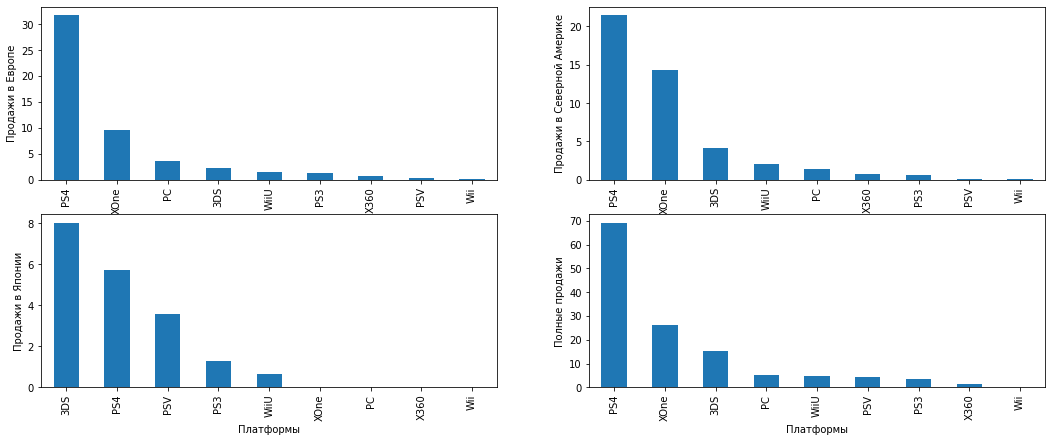

In [93]:
#построим гистограммы для разных регионов
fig, axis = plt.subplots(2,2, figsize=(18,7))

platforms_2016['eu_sales'].sort_values(ascending=False).plot.bar(ax=axis[0,0]).set(ylabel='Продажи в Европе');
platforms_2016['na_sales'].sort_values(ascending=False).plot.bar(ax=axis[0,1]).set(ylabel='Продажи в Северной Америке');
platforms_2016['jp_sales'].sort_values(ascending=False).plot.bar(ax=axis[1,0]).set(ylabel='Продажи в Японии', xlabel='Платформы');
platforms_2016['total_sales'].sort_values(ascending=False).plot.bar(ax=axis[1,1]).set(ylabel='Полные продажи', xlabel='Платформы');

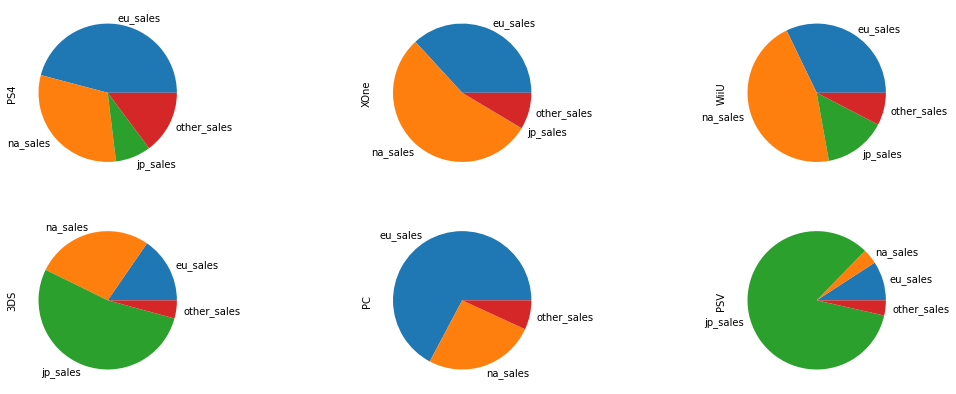

In [94]:
#Топ-5 коммерчески успешных платформ - это PS4, XOne, 3DS, PC и WiiU, но построим ещё и для PSV
#построим гистограммы для разных регионов
fig, axis = plt.subplots(2,3, figsize=(18,7))

platforms_2016.loc['PS4',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,0]);
platforms_2016.loc['XOne',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,1]);
platforms_2016.loc['3DS',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,0]);
platforms_2016.loc['PC',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,1]);
platforms_2016.loc['WiiU',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,2]);
platforms_2016.loc['PSV',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,2]);

5-топ платформ для разных регионов:
* для Европы: PS4, XOne, PC, 3DS, WiiU
* для Японии: 3DS, PS4, PSV, PS3, WiiU
* для Северной Америки: PS4, XOne, 3DS, Wii, PC

Различия в долях продаж представлены на круговых диаграммах, всё соответствует анализу из гистограмм выше.

#### Самые популярные жанры (топ-5). Пояснить разницу.

In [95]:
genres_2016 = game_2016.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], \
                                       ['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
genres_2016

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Shooter,15.90,1.06,16.24,5.02,38.22
Action,10.68,7.07,9.29,3.07,30.11
Sports,12.01,0.92,7.54,3.02,23.49
Role-Playing,4.28,6.61,5.89,1.40,18.18
Fighting,1.34,0.75,1.84,0.54,4.47
Platform,1.39,0.11,1.29,0.44,3.23
Adventure,1.32,1.18,0.95,0.37,3.82
Misc,0.66,1.04,0.76,0.14,2.60
Racing,1.77,0.01,0.73,0.28,2.79


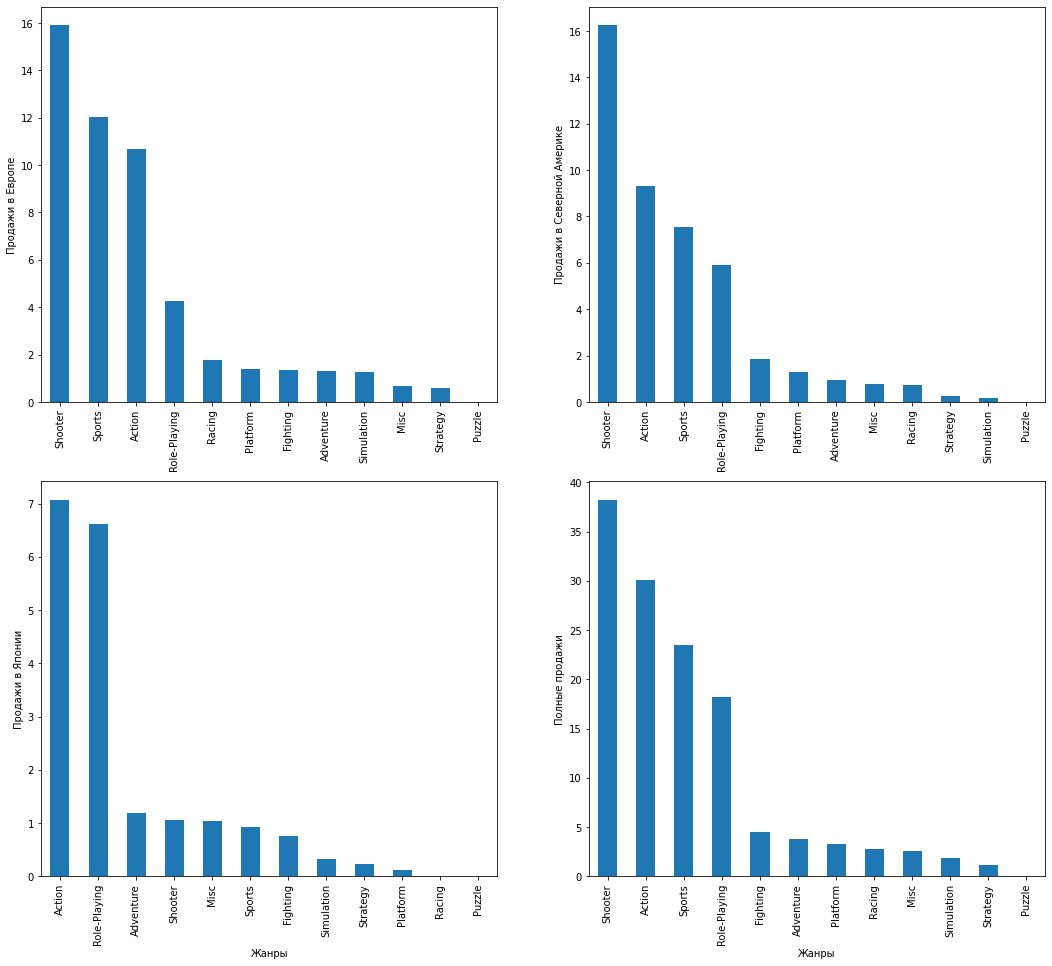

In [96]:
#построим гистограммы для разных регионов
fig, axis = plt.subplots(2,2, figsize=(18,16))

genres_2016['eu_sales'].sort_values(ascending=False).plot.bar(ax=axis[0,0]).set(ylabel='Продажи в Европе',xlabel='');
genres_2016['na_sales'].sort_values(ascending=False).plot.bar(ax=axis[0,1]).set(ylabel='Продажи в Северной Америке',xlabel='');
genres_2016['jp_sales'].sort_values(ascending=False).plot.bar(ax=axis[1,0]).set(ylabel='Продажи в Японии', xlabel='Жанры');
genres_2016['total_sales'].sort_values(ascending=False).plot.bar(ax=axis[1,1]).set(ylabel='Полные продажи', xlabel='Жанры');

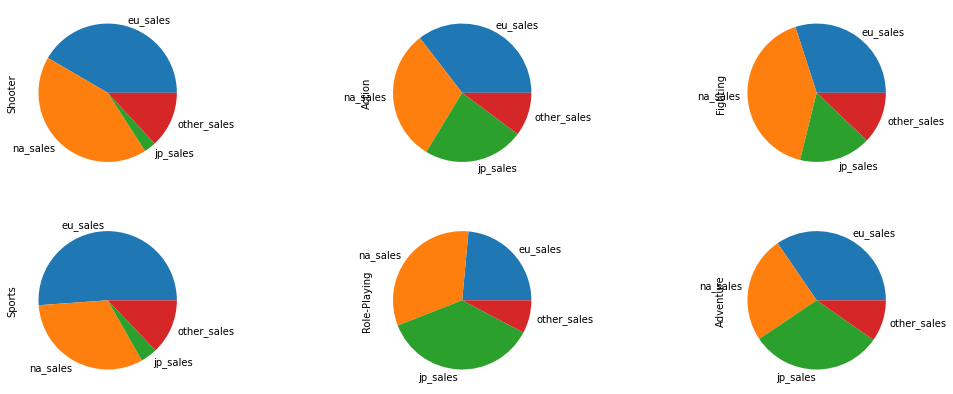

In [100]:
#Топ-5 коммерчески успешных жанров - это Shooter, Action, Sports, Role-Playing и Fighting, но построим ещё и для Adventure
#построим гистограммы для разных регионов
fig, axis = plt.subplots(2,3, figsize=(18,7))

genres_2016.loc['Shooter',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,0]);
genres_2016.loc['Action',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,1]);
genres_2016.loc['Sports',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,0]);
genres_2016.loc['Role-Playing',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,1]);
genres_2016.loc['Fighting',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[0,2]);
genres_2016.loc['Adventure',['eu_sales','na_sales','jp_sales','other_sales']].plot.pie(ax=axis[1,2]);

5-топ жанров для разных регионов:
* для Европы: Shooter, Sport, Action, Sports, Role-Playing и Racing
* для Японии: Action, Role-Playing, Adventure, Shooter, Music
* для Северной Америки: Shooter, Action, Sports, Role-Playing и Fighting

Различия в долях продаж представлены на круговых диаграммах, всё соответствует анализу из гистограмм выше.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

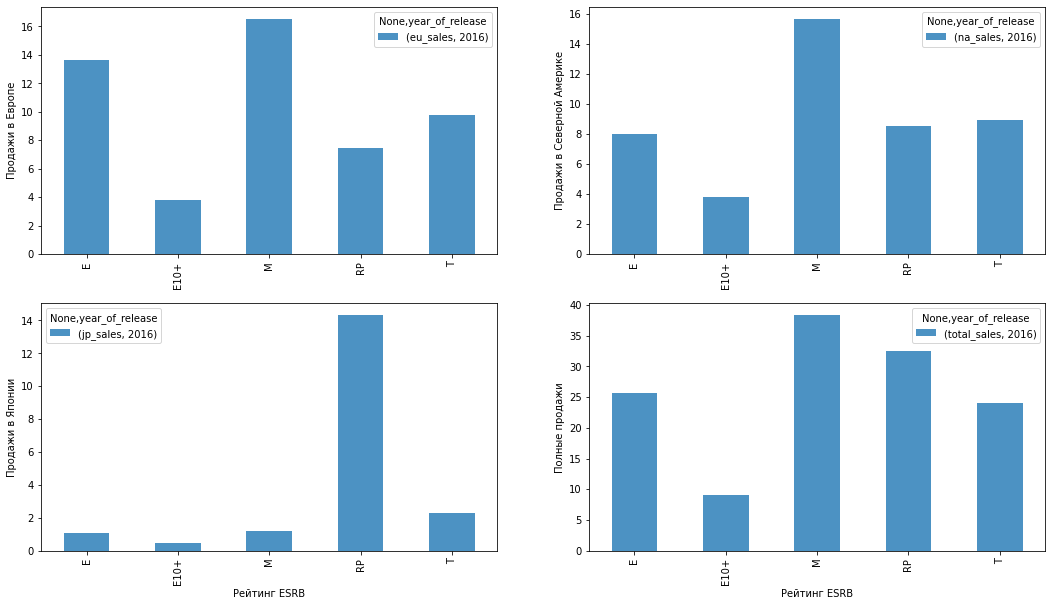

In [101]:
fig, axis = plt.subplots(2,2, figsize=(18,10))

game_2016.pivot_table('eu_sales',['rating','year_of_release'], aggfunc='sum') \
            .unstack().plot(kind='bar', alpha=.8, ax=axis[0,0]).set(ylabel='Продажи в Европе',xlabel='');
game_2016.pivot_table('na_sales',['rating','year_of_release'], aggfunc='sum') \
            .unstack().plot(kind='bar', alpha=.8, ax=axis[0,1]).set(ylabel='Продажи в Северной Америке',xlabel='');
game_2016.pivot_table('jp_sales',['rating','year_of_release'], aggfunc='sum') \
            .unstack().plot(kind='bar', alpha=.8, ax=axis[1,0]).set(ylabel='Продажи в Японии',xlabel='Рейтинг ESRB');
game_2016.pivot_table('total_sales',['rating','year_of_release'], aggfunc='sum') \
            .unstack().plot(kind='bar', alpha=.8, ax=axis[1,1]).set(ylabel='Полные продажи',xlabel='Рейтинг ESRB');

Как можно видеть, наиболее продаваемые игры в Европе и США и Канаде - это игры с рейтингом M, в эту категорию как раз и попадают Shooter и Actions. То есть можно сказать, что определённая зависимость между рейтингом и продажами есть. Совершенно другая картина для Японии: здесь игры без рейтинга покупают больше всех остальных категорий.

**Вывод**
1. Игроки из Европы предпочитают покупать следующие жанры игр: Shooter, Sport, Action. Большинство из них как раз и производится на платформах PS4 и XOne. Игры, имеющие рейтинги ESRB, они покупают в раз больше, чем те, которые без рейтингов.
2. Портрет игроков из Северной Америки схож с портретом европейских любителей видео игр, за одним исключением: игры в жанре Action они предпочитают больше, чем жанр Sport. Ситуация с играми без рейнтинга ESRB такая же, как и в случае Европы.
3. Игрокам из Японии безразлично, есть ли у игр рейтинг ESRB. Жанровые предпочтения также несколько отличаются: самыми популярными являются жанры Action и Role-Playing, что влечёт за собой и различие в топ-платформах. Так больше половины всех продаж платформы 3DS приходится на японский рынок, а для платформы PSV подавляющее большинство пользователей из Японии.

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [102]:
#для проверки гипотезы используем сначала data_cast
xone_cast = list(data_cast.query('platform == "XOne" and user_score != 0')['user_score'])
pc_cast = list(data_cast.query('platform == "PC" and user_score != 0')['user_score'])

$H_0$: Пользовательские рейтинги (user_score) платформы XOne = пользовательские рейтинги (user_score) платформы PC
за период с 2013 по 2016

$H_1$: Пользовательские рейтинги (user_score) платформы XOne ≠ пользовательские рейтинги (user_score) платформы PC
за период с 2013 по 2016
alpha = 0.05

In [103]:
# results = вызов метода для проверки гипотезы
results1 = st.ttest_ind(xone_cast, pc_cast, equal_var=False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('Значение p-value: {}'.format(results1.pvalue))
# условный оператор с выводом строки с ответом
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [104]:
#теперь возьмём полный датасет
xone_df = list(new_df.query('platform == "XOne"  and user_score != 0')['user_score'])
pc_df = list(new_df.query('platform == "PC" and user_score != 0')['user_score'])

$H_0$: Пользовательские рейтинги (user_score) платформы XOne = пользовательские рейтинги (user_score) платформы PC
за весь период

$H_1$: Пользовательские рейтинги (user_score) платформы XOne ≠ пользовательские рейтинги (user_score) платформы PC
за весь период

alpha = 0.05

In [105]:
# results = вызов метода для проверки гипотезы
results2 = st.ttest_ind(xone_df, pc_df, equal_var=False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('Значение p-value: {}'.format(results2.pvalue))
# условный оператор с выводом строки с ответом
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Получается, что если мы берём данные за 2013 - 2016 гг, то пользовательские рейтинги платформы XOne равны рейтингам платформы PC. Но если мы берём данные за весь период, то результат противоположный, и пользовательские рейтинги платформ не равны друг другу.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [122]:
#для проверки гипотезы используем сначала data_cast
action_cast = list(data_cast.query('genre == "Action" and user_score != 0')['user_score'])
sports_cast = list(data_cast.query('genre == "Sports" and user_score != 0')['user_score'])

$H_0$: Пользовательские рейтинги (user_score) жанра Action = пользовательские рейтинги (user_score) жанра Sports
за период с 2013 по 2016

$H_1$: Пользовательские рейтинги (user_score) жанра Action ≠ пользовательские рейтинги (user_score) жанра Sports
за период с 2013 по 2016
alpha = 0.05

In [123]:
# results = вызов метода для проверки гипотезы
results1 = st.ttest_ind(action_cast, sports_cast, equal_var=False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('Значение p-value: {}'.format(results1.pvalue))
# условный оператор с выводом строки с ответом
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 2.419141451747253e-20
Отвергаем нулевую гипотезу


In [124]:
#теперь возьмём полный датасет
action_df = list(data_cast.query('genre == "Action" and user_score != 0')['user_score'])
sports_df = list(data_cast.query('genre == "Sports" and user_score != 0')['user_score'])

$H_0$: Пользовательские рейтинги (user_score) жанра Action = пользовательские рейтинги (user_score) жанра Sports
за весь период

$H_1$: Пользовательские рейтинги (user_score) жанра Action ≠ пользовательские рейтинги (user_score) жанра Sports
за весь период
alpha = 0.05

In [125]:
# results = вызов метода для проверки гипотезы
results2 = st.ttest_ind(xone_df, pc_df, equal_var=False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('Значение p-value: {}'.format(results2.pvalue))
# условный оператор с выводом строки с ответом
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Для двух наборов данных результат получился одинаковым: мы отвергли нулевую гипотезу, то есть пользовательские рейтинги жанра Action не равны пользовательским рейтингам жанра Sports как за период с 2013 по 2016, так и за весь период.

## Общий вывод

В этом проекте мы исследовали базу данных из открытых источников, в ней содержатся исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Перед нами стояла задача выявить закономерности, определяющие успешность игры на рынке.

В процессе исследования данных мы осуществили их предобработку: устранили пропуски в всех столбцах, где это возможно, заменили эти значения из общих соображений. В столбцах, касающихся оценок критиков и пользователей, мы заменили остутствующие значения на 0, также мы поступили и со значением tbd. Изменили типы данных, добавили новый столбец с общими продажами по всем регионам.

Далее был проведён исследовательский анализ данных, в результате которого были выявлены некоторые закономерности. 
1. До 1994 года выпускалось не более 100 игр в год. С 1994 до 1998 мы наблюдали рост количества выпускаемых игр. В 1999 - 2000 заметен небольшой спад. А затем был резкий скачок с 490 в 2001 до 850 в 2002. После был небольшой двухгодичный спад, аналогичный периоду концу 90-х. Далее - рост до 2007-08 годов, где количество игр в год достигло максимума в 1450. После этого наблюдался спад, и к 2012 году количество видео игр уменьшилось в два раза. За последующие годы количество выпускаемого контента оставалось примерно в одних пределах. В силу большого временного разброса данных не все они пригодятся для последующих проверок гипотез, поскольку часть платформ просто ушла с рынка компьютерных игр. 
2. В связи с этим были вычислены среднее "время жизни" платформы (8 лет) и время появления новой компании на рынке (примерно каждый год). Причем тенденции развития разных платформ схожи: первые годы - набирание популярности, затем наступает пик популярности, а после - спад интереса к контенту, выпускаемому этой платформой.  
3. В качестве актуального периода для постоения прогноза на 2017 год был выбран промежуток с 2013 по 2016. На момент 2016 года актуальными платформами остаются PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV и Wii.
4. Из анализа данных актуального периода можно увидеть тренд к уменьшению количества прибыли выпускаемых игр. Тем не менее, на основе данных за 2016 год можно выделить несколько потенциально прибыльных компаний: PS4, 3DS, XOne и WiiU. 
5. Из анализа диаграммы размаха следует, что у всех платформ среднее больше медианного значения, также в выдорках присутствует много выбросов. Из анализа длин верхних усов был сделан вывод, что самыми прибыльными платформами являются PS4, X360 и XOne.
6. На примере платформы XOne были посчитаны корреляции между отзывами критиков и пользователей и показателями продажи. Оценки критиков до некоторой степени влияют на показатели продаж (0.27), а корреляция между рейтингом пользователей и продажами в два раза меньше, поэтому, скорее всего, зависимости нет. Поэтому имеет смысл получать как можно больше высоких оценок от критиков, чтобы увеличить продажи выпускаемых игр. Интересной также является корреляция между мнением пользователей и критиков (0.77). 
Было бы интересно посмотреть для каких жанров мнение критиков оказывает большее влияние на оценку игрроков.
7. Помимо анализа для отдельной платформы, было проведено исследование игровых жанров: 
   * больше всего выпускалось игр в жанрах Action, Role_Playing и Adventure
   * наиболее коммерчески успешными были жанры Shooter, Role Playing и Fighting 
   Если смотреть на количество выпускаемых игр, то для платформ PC, PS4 и XOne есть тенденция к увеличению количества выпускаемого контента. Для остальных платформ тенденция совершенно противоположная. 
   
Было бы также интересно выяснить влияет ли на успешность платформы количество жанров, в которых выпускаются игры, и их влияние на "время жизни" платформы на рынке.

Кроме всего вышеперчисленного, был проведён анализ пользователей из Европы, Северной Америки и Японии. Портрет игроков из Северной Америки схож с портретом европейских любителей видео игр, но отличается от японских пользователей. За актуальный период с помощью круговых диаграмм были продемонстрированы различия в продажах игр для каждого рынка. 
1. Топ-5 самых популярных платформ для разных регионов:
    * для Европы: PS4, XOne, PC, 3DS, WiiU
    * для Японии: 3DS, PS4, PSV, PS3, WiiU
    * для Северной Америки: PS4, XOne, 3DS, Wii, PC 
    Больше половины всех продаж платформы 3DS приходится на японский рынок, а для платформы PSV подавляющее большинство пользователей из Японии. 
2. Топ-5 самых популярных жанров для разных регионов:
    * для Европы: Shooter, Sport, Action, Sports, Role-Playing и Racing
    * для Японии: Action, Role-Playing, Adventure, Shooter, Music
    * для Северной Америки: Shooter, Action, Sports, Role-Playing и Fighting
3. Определённая зависимость между рейтингом и продажами есть для европейского и американского рынков. Наиболее продаваемые игры в Европе, США и Канаде - это игры с рейтингом M, в эту категорию как раз и попадают Shooter и Actions. Совершенно другая картина для Японии: здесь игры без рейтинга ESRB покупают больше всех остальных категорий. Возможно, это связано с тем, что в Японии есть своя рейтинговая система, отличная от представленной в этих данных.

Вдобавок ко всему был проведён небольшой статистический анализ данных: были проверены несколько гипотез. 
1. Сравнивались рейтинги пользователей для платформ Xbox One и PC. Оказалось, что результат в данном случае зависит от выбора временного периода. Если брать данные за весь период, то платформы имеют различные показатели оценок пользователей. Ситуация совершенно меняется для данных с 2013 по 2016. 
2. Также было произведено сравнение двух жанров: Action и Sports, на основе пользовательских оценок. Вне зависимости от временного промежутка данных рейтинги этих двух жанров оказались не равны друг другу. При проверке обеих гипотез использовался порог статистической значимости, равный 0.05.